# Kickstarter 펀딩 성공여부 분류

개인이나 기업이 상품 아이디어, 모금 목표액, 개발 완료 예정 시점 등을 사이트에 올려놓으면 프로젝트를 지지하는 킥스타터 회원이 후원자로 나서는 시스템

In [2]:
kickstart1 = pd.read_excel('kickstart1.xls')


| 변수명 | 자료형 | 변수 설명 | 변수 설정 | 
|------------------|------|----------|---------|
| goal_achievement | 카테고리 |프로젝트의 펀딩 성공 여부 (타겟변수 1) | 펀딩 성공시 1, 아니면 0 |
| backed | 연속형 |프로젝트 제작자의 현재까지의 모금 횟수 | |
| created | 연속형 |프로젝트 제작자의 현재까지의 펀딩 설립 횟수 | |
| img | 연속형 |프로젝트 소개 페이지에 올라온 사진의 수 | |
| text | 연속형 |프로젝트에 본문의 텍스트 글자 수 | 단위: 글자 수|
| goal_ex | 연속형|펀딩 목표금액 | 단위: 달러 |
| period | 연속형 |펀딩 기간 | 단위: 일 |
| tier_count | 연속형 |선택할 수 있는 모금종류의 수 | |
| tier_min_ex | 연속형|가장 저렴한 모금액 | 프로젝트 종료 시점의 USD 환율로 환산 |
| tier_median_ex | 연속형|모금액의 중앙값 | 프로젝트 종료 시점의 USD 환율로 환산 | 
| video | 연속형 |비디오 업로드 여부 | 1:업로드, 0:업로드 없음 |
| category | 카테고리 |프로젝트가 속한 카테고리 | |
| category_art          | 카테고리 | 카테고리가 art인지 | 1: art,  0: art가 아님 |
| category_comics       | 카테고리 | 카테고리가 comics인지|  1: comics,  0: comics 아님 |
| category_crafts       | 카테고리 | 카테고리가 crafts인지| 1: crafts,  0: crafts 아님 |
| category_dance        | 카테고리 | 카테고리가 dance인지| 1: dance,  0: dance 아님 |
| category_design       | 카테고리 | 카테고리가 design인지| 1: design,  0: design 아님 |
| category_fashion      | 카테고리 | 카테고리가 fashion인지| 1: fashion,  0: fashion 아님 |
| category_film & video | 카테고리 | 카테고리가 film & video인지| 1: film & video,  0: film & video 아님 |
| category_food         | 카테고리 | 카테고리가 food인지| 1: food,  0: food 아님 |
| category_games        | 카테고리 | 카테고리가 games인지| 1: games,  0: games 아님 |
| category_journalism   | 카테고리 | 카테고리가 journalism인지| 1: journalism,  0: journalism 아님 |
| category_music        | 카테고리 | 카테고리가 music인지| 1: music,  0: music 아님 |
| category_photography  | 카테고리 | 카테고리가 photography인지| 1: photography,  0: photography 아님 |
| category_publishing   | 카테고리 | 카테고리가 publishing인지| 1: publishing,  0: publishing 아님 |
| category_technology   | 카테고리 | 카테고리가 technology인지| 1: technology,  0: technology 아님 |
| category_theater      | 카테고리 | 카테고리가 theater인지| 1: theater,  0: theater 아님  |
| eng_country | 카테고리 |프로젝트가 생성된 나라가 영어권 국가인지 아닌지 여부 | 영어권 국가: 1, 비영어권 국가: 0 |

In [31]:
pd.options.display.max_columns = 30
kickstart1[['period', 
            'img', 
            'text', 
            'backed', 
            'created', 
            'goal_ex', 
            'tier_count', 
            'tier_min_ex', 
            'tier_median_ex']].describe()

,period,img,text,backed,created,goal_ex,tier_count,tier_min_ex,tier_median_ex
count,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3.673000e+03,3673.000000,3673.000000,3673.000000
mean,35.375715,11.740811,4282.832562,7.703240,1.781105,2.590829e+04,9.087395,19.667091,118.864271
std,12.342400,14.902819,3820.912875,26.281276,2.676555,1.909164e+05,6.120009,126.547070,286.494142
min,-251.000000,0.000000,3.000000,0.000000,1.000000,7.559722e+00,1.000000,0.000000,1.000000
25%,30.000000,1.000000,1620.000000,0.000000,1.000000,2.750000e+03,5.000000,1.070205,32.500000
50%,30.000000,7.000000,3186.000000,1.000000,1.000000,7.500000e+03,8.000000,5.000000,60.000000
75%,40.000000,17.000000,5644.000000,5.000000,2.000000,2.000000e+04,12.000000,10.000000,109.000000
max,61.000000,131.000000,30945.000000,755.000000,58.000000,1.057714e+07,69.000000,5000.000000,6000.000000


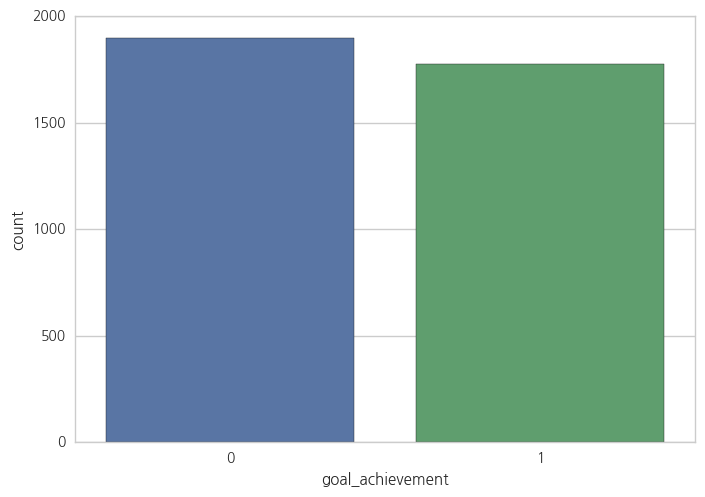

In [24]:
sns.countplot(x = 'goal_achievement',
              data = kickstart1)
plt.show()

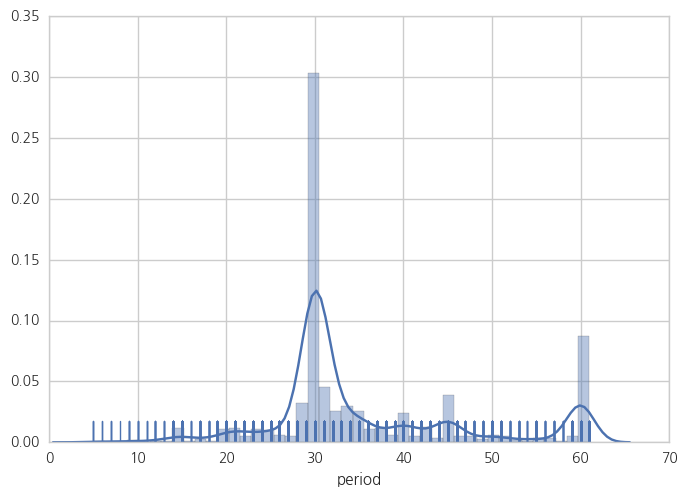

In [118]:
sns.distplot(kickstart1.period,
             kde = True,
             rug = True)
plt.show()

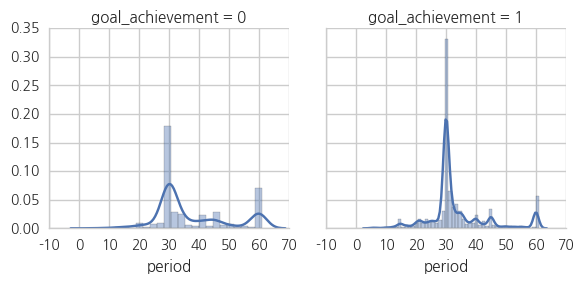

In [130]:
period_grid = sns.FacetGrid(kickstart1, col = 'goal_achievement')
period_grid.map(sns.distplot, 'period')
plt.show()

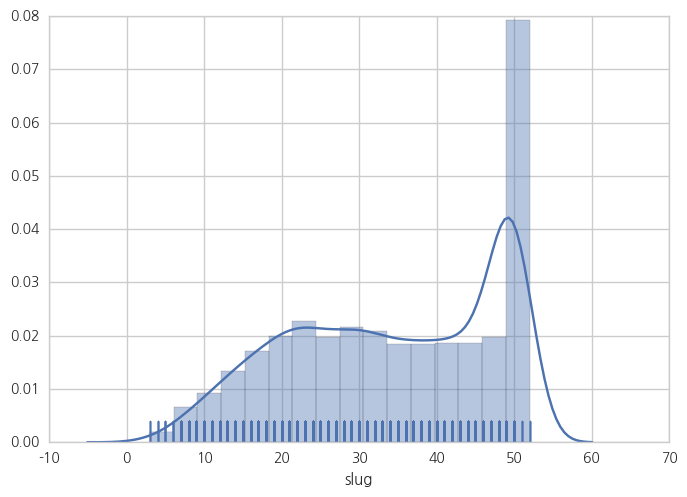

In [119]:
sns.distplot(kickstart1.slug,
             kde = True,
             rug = True)
plt.show()

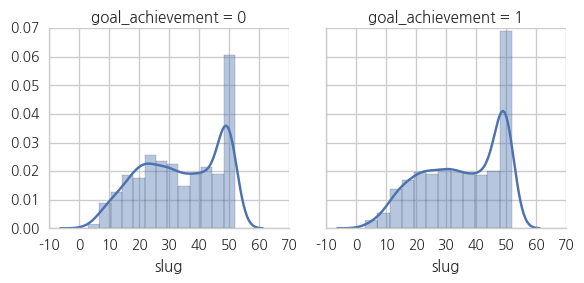

In [120]:
slug_grid = sns.FacetGrid(kickstart1, col = 'goal_achievement')
slug_grid.map(sns.distplot, 'slug')
plt.show()

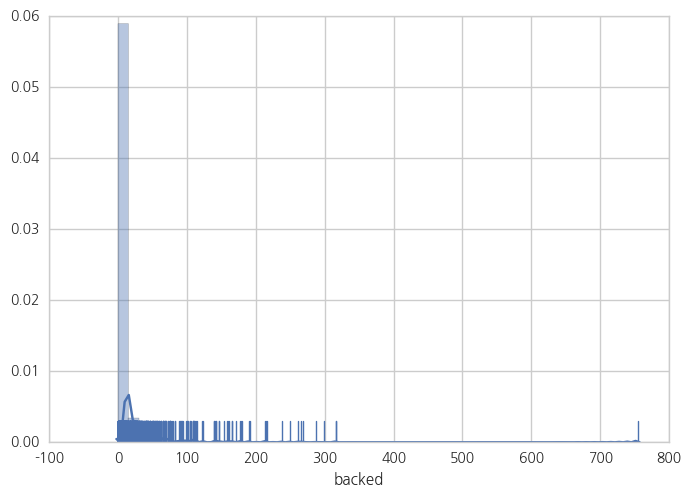

In [132]:
sns.distplot(kickstart1.backed,
             kde = True,
             rug = True)
plt.show()

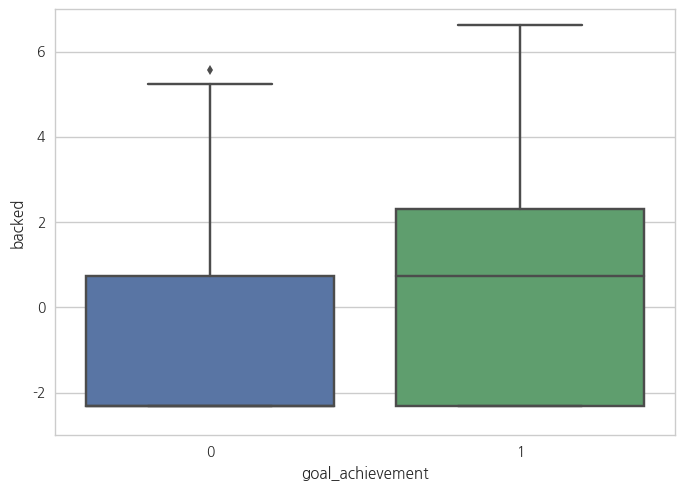

In [121]:
sns.boxplot(x = 'goal_achievement',
            y = np.log(0.1 + kickstart1.backed),
            data = kickstart1)
plt.show()

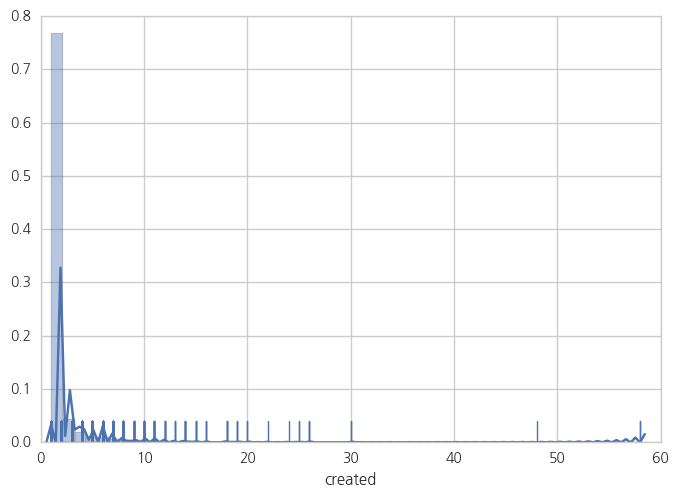

In [10]:
sns.distplot(kickstart1.created,
             kde = True,
             rug = True)
plt.show()

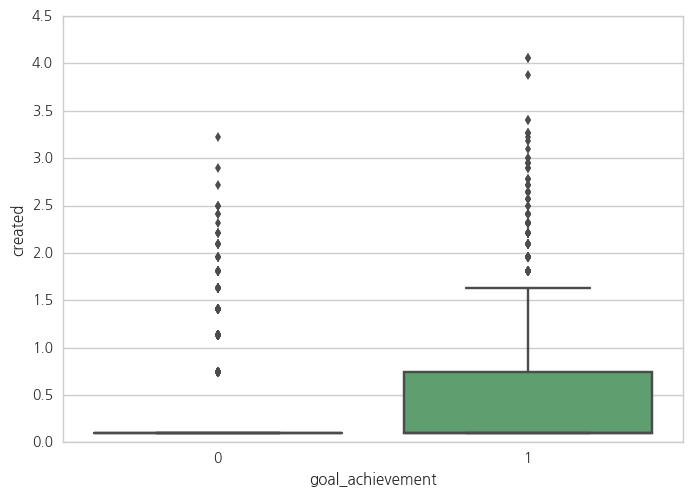

In [122]:
sns.boxplot(x = 'goal_achievement',
            y = np.log(0.1 + kickstart1.created),
            data = kickstart1)
plt.show()

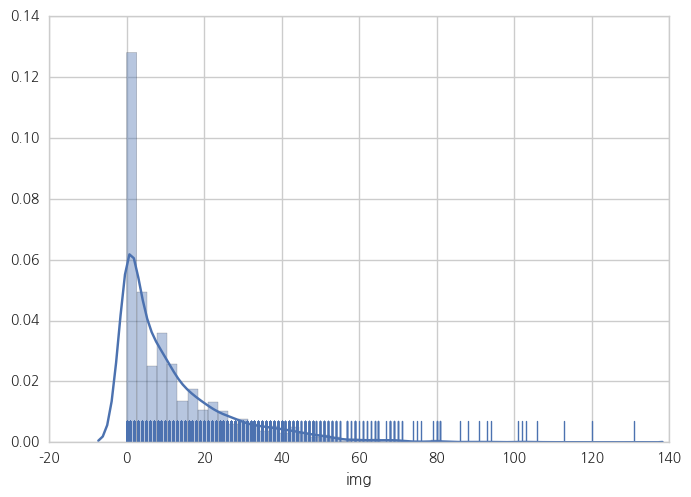

In [12]:
sns.distplot(kickstart1.img,
             kde = True,
             rug = True)
plt.show()

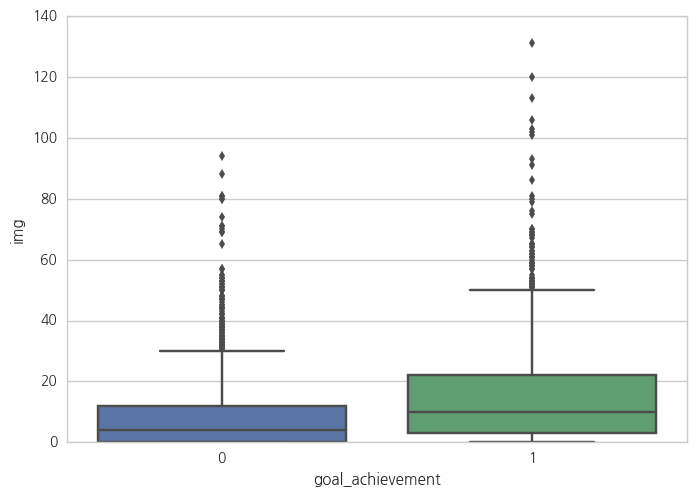

In [123]:
sns.boxplot(x = 'goal_achievement',
            y = 'img',
            data = kickstart1)
plt.show()

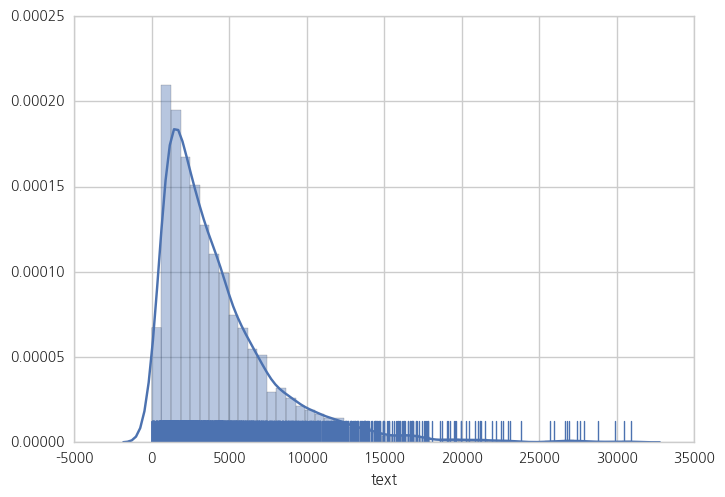

In [14]:
sns.distplot(kickstart1.text,
             kde = True,
             rug = True)
plt.show()

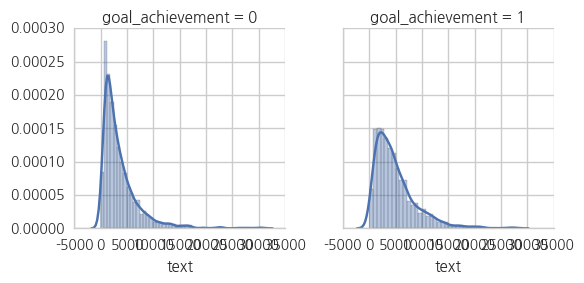

In [124]:
text_grid = sns.FacetGrid(kickstart1, col = 'goal_achievement')
text_grid.map(sns.distplot, 'text')
plt.show()

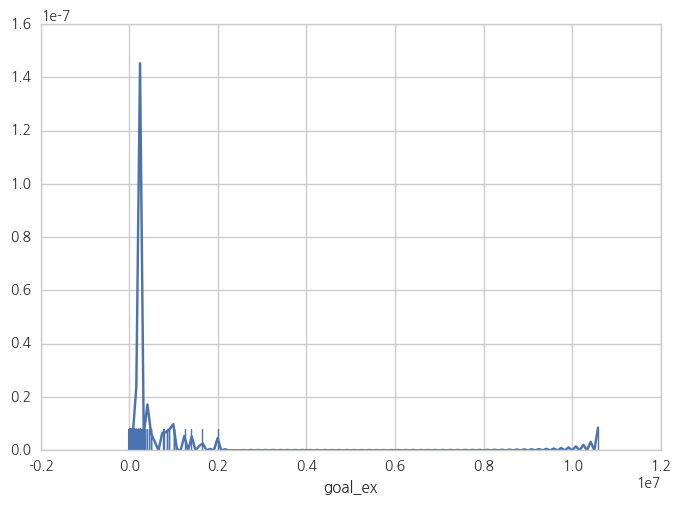

In [16]:
sns.distplot(kickstart1.goal_ex,
             hist = False,
             kde = True,
             rug = True)
plt.show()

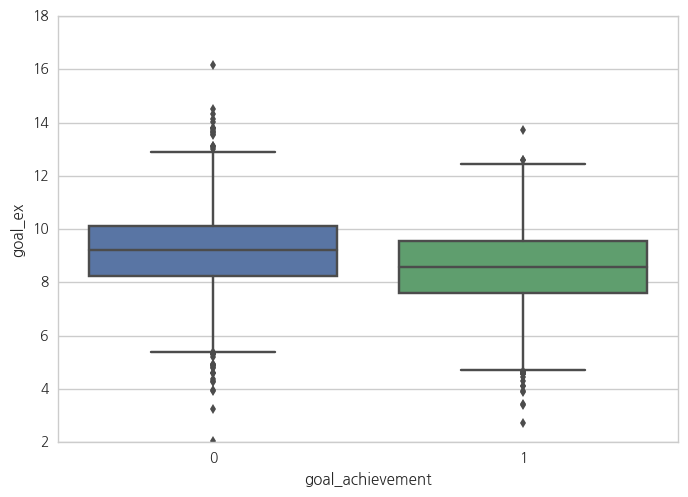

In [125]:
sns.boxplot(x = 'goal_achievement',
            y = np.log(0.1 + kickstart1.goal_ex),
            data = kickstart1)
plt.show()

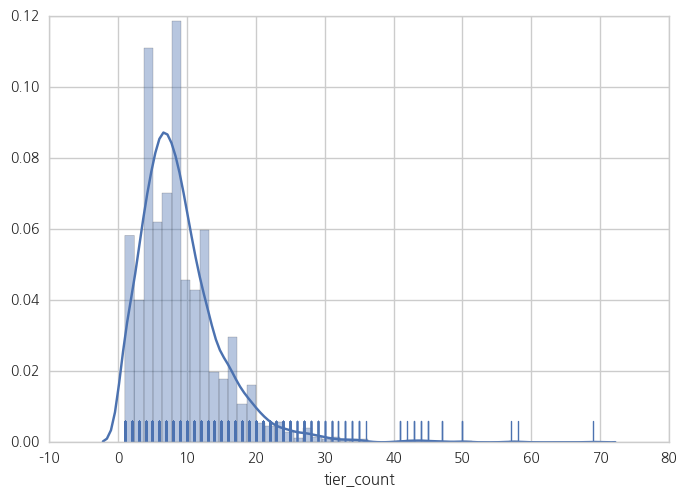

In [18]:
sns.distplot(kickstart1.tier_count,
             kde = True,
             rug = True)
plt.show()

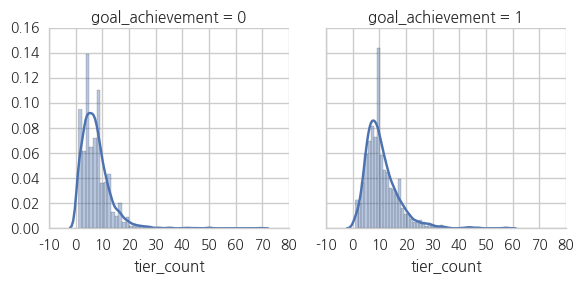

In [126]:
text_grid = sns.FacetGrid(kickstart1, col = 'goal_achievement')
text_grid.map(sns.distplot, 'tier_count')
plt.show()

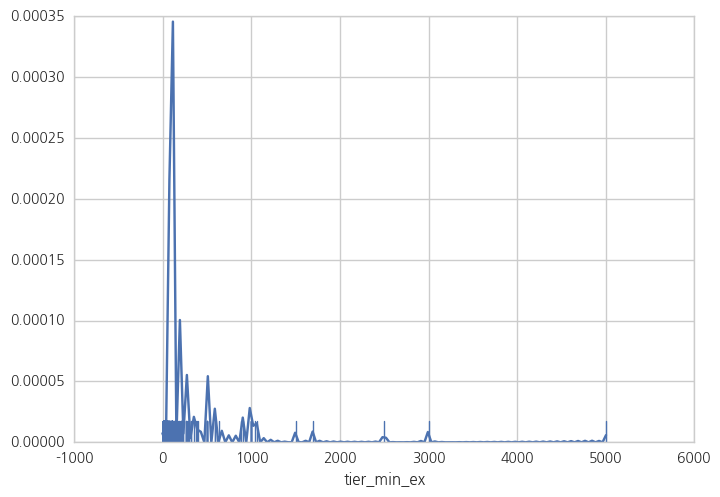

In [20]:
sns.distplot(kickstart1.tier_min_ex,
             hist = False,
             kde = True,
             rug = True)
plt.show()

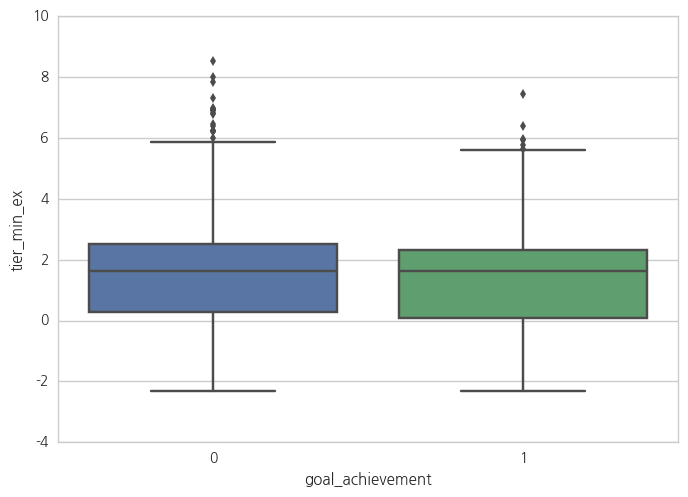

In [127]:
sns.boxplot(x = 'goal_achievement',
            y = np.log(0.1 + kickstart1.tier_min_ex),
            data = kickstart1)
plt.show()

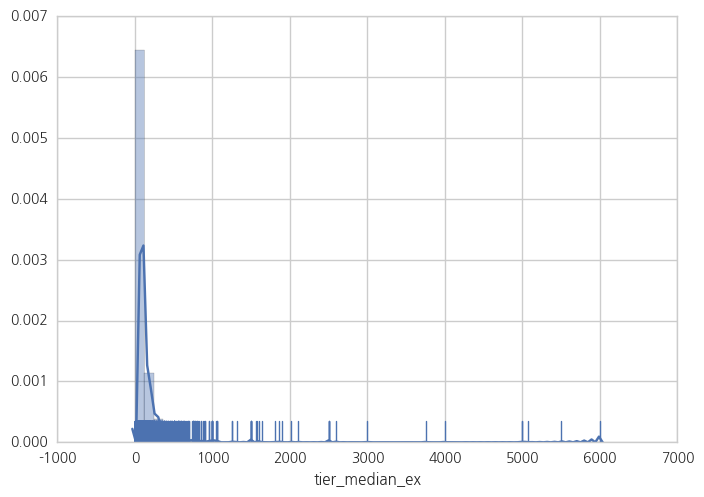

In [22]:
sns.distplot(kickstart1.tier_median_ex,
             kde = True,
             rug = True)
plt.show()

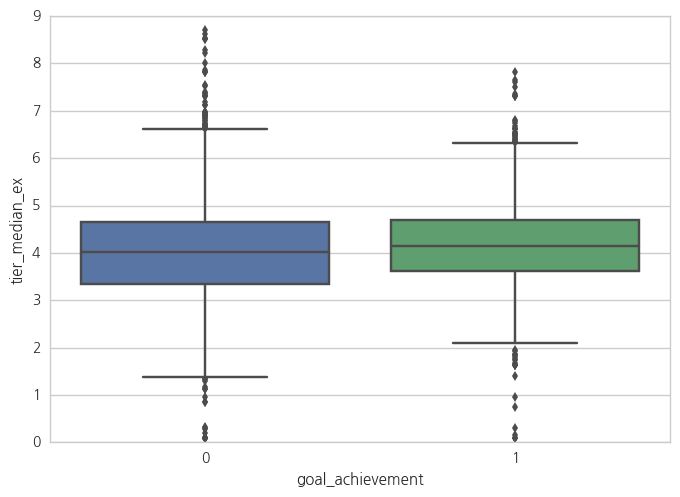

In [128]:
sns.boxplot(x = 'goal_achievement',
            y = np.log(0.1 + kickstart1.tier_median_ex),
            data = kickstart1)
plt.show()

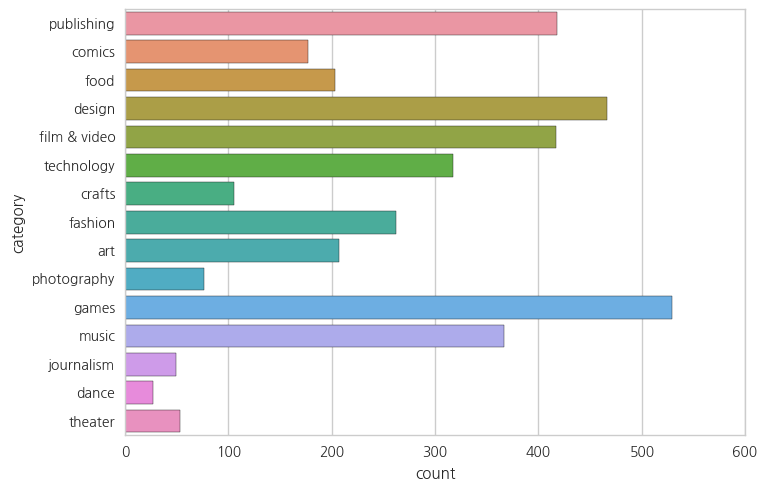

In [25]:
sns.countplot(y = 'category',
              data = kickstart1)
plt.show()

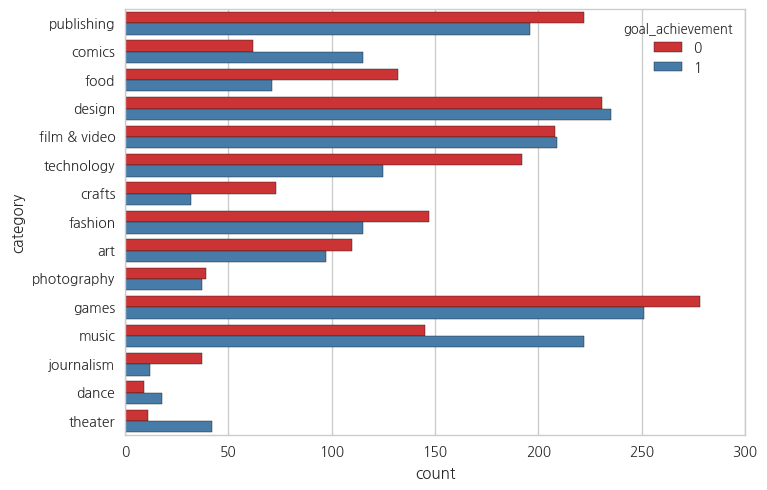

In [26]:
sns.countplot(y = 'category',
              hue = 'goal_achievement',
              data = kickstart1,
              palette = 'Set1')
plt.show()

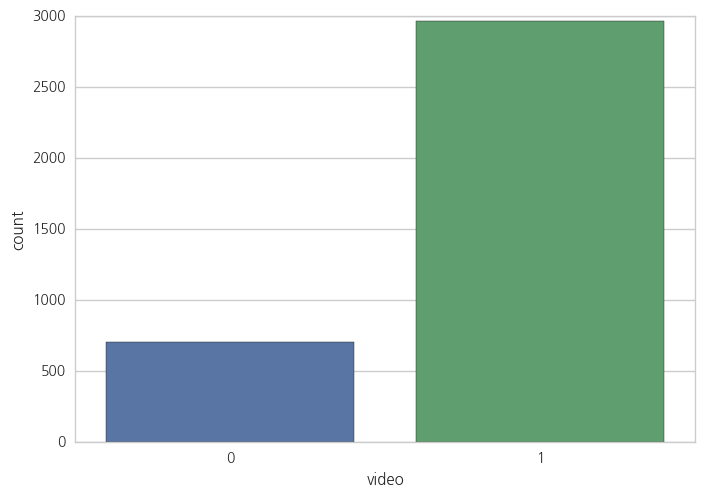

In [27]:
sns.countplot(x = 'video', data = kickstart1)
plt.show()

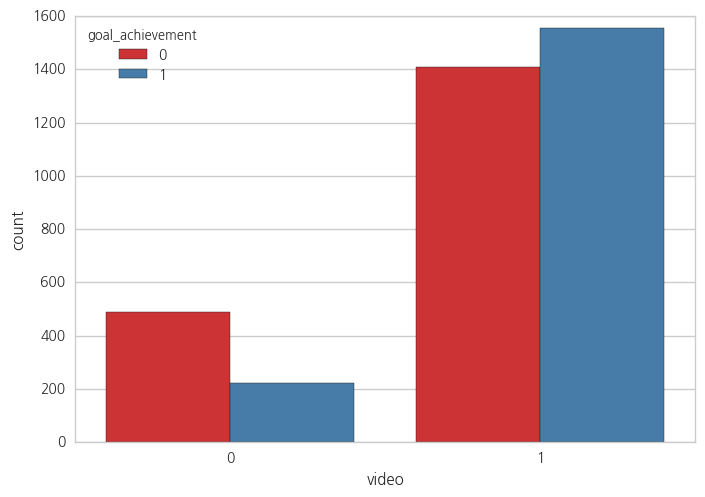

In [129]:
sns.countplot(x = 'video', 
              hue = 'goal_achievement',
              data = kickstart1,
              palette = 'Set1')
plt.show()

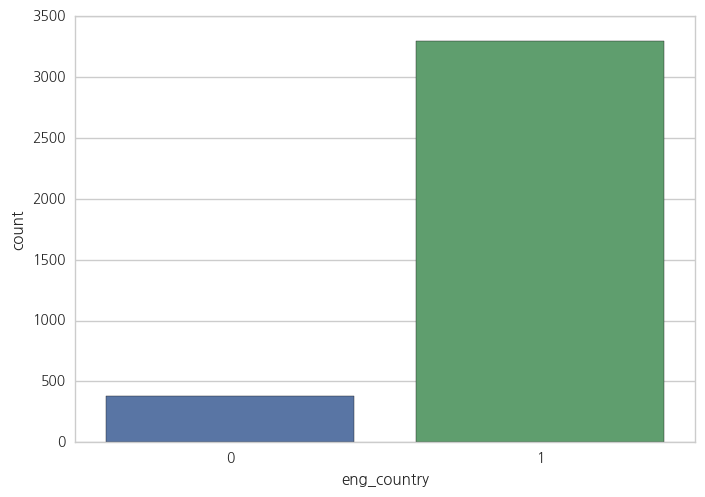

In [29]:
sns.countplot(x = 'eng_country', data = kickstart1)
plt.show()

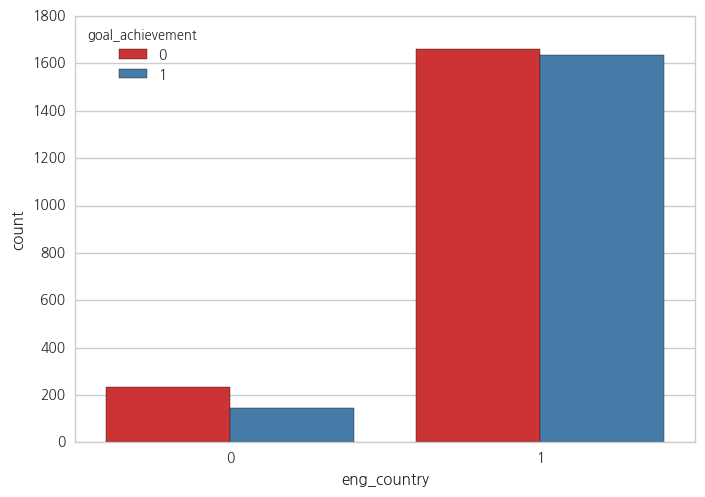

In [30]:
sns.countplot(x = 'eng_country', 
              hue = 'goal_achievement',
              data = kickstart1,
              palette = 'Set1')
plt.show()

### 분석 1. 프로젝트 성공여부의 분류 (로지스틱 회귀분석)

In [2]:
# 1. 모든 변수 투입
kick_logistic_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img', u'text',
       u'video', u'goal_ex', u'tier_count', u'tier_min_ex',
       u'tier_median_ex', u'eng_country', u'category_art',
       u'category_comics', u'category_crafts', u'category_dance',
       u'category_design', u'category_fashion', u'category_film & video',
       u'category_food', u'category_games', u'category_journalism',
       u'category_music', u'category_photography', u'category_publishing',
       u'category_technology', u'category_theater']]
kick_logistic_target = kickstart1['goal_achievement']

In [3]:
import statsmodels.api as sm
kick_logistic_features = sm.add_constant(kick_logistic_features)

In [60]:
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_logistic_target, n_iter=3, test_size=0.3, random_state=10):
    X_train_list.append(kick_logistic_features.ix[train_idx])
    X_test_list.append(kick_logistic_features.ix[test_idx])
    y_train_list.append(kick_logistic_target.ix[train_idx])
    y_test_list.append(kick_logistic_target.ix[test_idx])

In [61]:
logistic_f0 = sm.Logit(y_train_list[0], X_train_list[0]).fit()
logistic_f1 = sm.Logit(y_train_list[1], X_train_list[1]).fit()
logistic_f2 = sm.Logit(y_train_list[2], X_train_list[2]).fit()

Optimization terminated successfully.
         Current function value: 0.552839
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.560563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.551775
         Iterations 8


In [62]:
logistic_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2543
Method:                           MLE   Df Model:                           26
Date:                Thu, 16 Mar 2017   Pseudo R-squ.:                  0.1907
Time:                        13:59:33   Log-Likelihood:                -1440.6
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                1.952e-126
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.9020        nan        nan        nan         nan         nan
period                   -0.0299      0.004     -6.983      0.000      -0.038      -0.021
slug                      0.0001      0.004      0.040      0.968      -0.007       0.007
backed                    0.0190      0.004      4.554      0.000       0.011       0.027
created                   0.1282      0.034      3.812      0.000       0.062       0.194
img                       0.0324      0.004      7.368      0.000       0.024       0.041
text                   2.125e-05   1.47e-05      1.444      0.149    -7.6e-06    5.01e-05
video                     0.4133      0.130      3.174      0.002       0.158       0.669
goal_ex               -1.331e-05   2.07e-06     -6.418      0.000   -1.74e-05   -9.25e-06
tier_count                0.0877      0.010      8.670      0.000       0.068       0.108
tier_min_ex              -0.0003      0.001     -0.464      0.642      -0.002       0.001
tier_median_ex           -0.0002      0.000     -0.727      0.467      -0.001       0.000
eng_country               0.5034      0.156      3.222      0.001       0.197       0.810
category_art              0.0387        nan        nan        nan         nan         nan
category_comics          -0.2100        nan        nan        nan         nan         nan
category_crafts          -0.8736        nan        nan        nan         nan         nan
category_dance            1.0468        nan        nan        nan         nan         nan
category_design          -0.4882        nan        nan        nan         nan         nan
category_fashion         -0.6164        nan        nan        nan         nan         nan
category_film & video    -0.0965        nan        nan        nan         nan         nan
category_food            -0.4662        nan        nan        nan         nan         nan
category_games           -0.7855        nan        nan        nan         nan         nan
category_journalism      -0.5220        nan        nan        nan         nan         nan
category_music            0.8035        nan        nan        nan         nan         nan
category_photography      0.3017        nan        nan        nan         nan         nan
category_publishing      -0.1226        nan        nan        nan         nan         nan
category_technology      -0.4813        nan        nan        nan         nan         nan
category_theater          1.5694        nan        nan        nan         nan         nan
=========================================================================================
"""

In [38]:
# 2. 카테고리 변수의 제거
kick_logistic2_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img', u'text',
       u'video', u'goal_ex', u'tier_count', u'tier_min_ex',
       u'tier_median_ex', u'eng_country']]
kick_logistic2_target = kickstart1['goal_achievement']

In [39]:
import statsmodels.api as sm
kick_logistic2_features = sm.add_constant(kick_logistic2_features)

In [40]:
X_train2_list = []
X_test2_list = []
y_train2_list = []
y_test2_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_logistic2_target, n_iter=3, test_size=0.3, random_state=10):
    X_train2_list.append(kick_logistic2_features.ix[train_idx])
    X_test2_list.append(kick_logistic2_features.ix[test_idx])
    y_train2_list.append(kick_logistic2_target.ix[train_idx])
    y_test2_list.append(kick_logistic2_target.ix[test_idx])

In [41]:
logistic2_f0 = sm.Logit(y_train2_list[0], X_train2_list[0]).fit()
logistic2_f1 = sm.Logit(y_train2_list[1], X_train2_list[1]).fit()
logistic2_f2 = sm.Logit(y_train2_list[2], X_train2_list[2]).fit()

Optimization terminated successfully.
         Current function value: 0.579274
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.582647
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.577926
         Iterations 8


In [42]:
logistic2_f0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2557
Method:                           MLE   Df Model:                           12
Date:                Sun, 19 Mar 2017   Pseudo R-squ.:                  0.1637
Time:                        09:15:49   Log-Likelihood:                -1488.7
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                5.251e-117
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9420      0.260     -3.623      0.000      -1.452      -0.432
period            -0.0278      0.004     -6.689      0.000      -0.036      -0.020
slug              -0.0034      0.003     -0.986      0.324      -0.010       0.003
backed             0.0156      0.004      4.204      0.000       0.008       0.023
created            0.0838      0.029      2.900      0.004       0.027       0.140
img                0.0187      0.004      4.902      0.000       0.011       0.026
text            2.308e-05    1.5e-05      1.537      0.124   -6.35e-06    5.25e-05
video              0.4845      0.123      3.932      0.000       0.243       0.726
goal_ex        -1.859e-05   2.28e-06     -8.157      0.000   -2.31e-05   -1.41e-05
tier_count         0.0982      0.010      9.806      0.000       0.079       0.118
tier_min_ex        0.0002      0.001      0.292      0.770      -0.001       0.002
tier_median_ex    -0.0001      0.000     -0.527      0.598      -0.001       0.000
eng_country        0.5471      0.152      3.609      0.000       0.250       0.844
==================================================================================
"""

In [43]:
logistic2_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2557
Method:                           MLE   Df Model:                           12
Date:                Sun, 19 Mar 2017   Pseudo R-squ.:                  0.1588
Time:                        09:15:49   Log-Likelihood:                -1497.4
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                2.630e-113
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1264      0.262     -4.296      0.000      -1.640      -0.612
period            -0.0278      0.004     -6.749      0.000      -0.036      -0.020
slug               0.0002      0.003      0.047      0.963      -0.007       0.007
backed             0.0158      0.004      4.072      0.000       0.008       0.023
created            0.1034      0.032      3.273      0.001       0.041       0.165
img                0.0191      0.004      5.052      0.000       0.012       0.027
text            1.619e-05   1.43e-05      1.136      0.256   -1.17e-05    4.41e-05
video              0.4974      0.125      3.973      0.000       0.252       0.743
goal_ex        -1.451e-05   2.05e-06     -7.063      0.000   -1.85e-05   -1.05e-05
tier_count         0.0931      0.010      9.452      0.000       0.074       0.112
tier_min_ex       -0.0005      0.001     -0.675      0.500      -0.002       0.001
tier_median_ex -8.561e-05      0.000     -0.354      0.723      -0.001       0.000
eng_country        0.5588      0.153      3.652      0.000       0.259       0.859
==================================================================================
"""

In [44]:
logistic2_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2557
Method:                           MLE   Df Model:                           12
Date:                Sun, 19 Mar 2017   Pseudo R-squ.:                  0.1656
Time:                        09:15:49   Log-Likelihood:                -1485.3
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                1.742e-118
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2446      0.262     -4.752      0.000      -1.758      -0.731
period            -0.0260      0.004     -6.160      0.000      -0.034      -0.018
slug              -0.0007      0.003     -0.198      0.843      -0.007       0.006
backed             0.0113      0.004      3.163      0.002       0.004       0.018
created            0.1074      0.032      3.369      0.001       0.045       0.170
img                0.0230      0.004      5.995      0.000       0.015       0.031
text            1.781e-05   1.49e-05      1.192      0.233   -1.15e-05    4.71e-05
video              0.5385      0.123      4.365      0.000       0.297       0.780
goal_ex         -1.63e-05   2.09e-06     -7.782      0.000   -2.04e-05   -1.22e-05
tier_count         0.0993      0.010      9.899      0.000       0.080       0.119
tier_min_ex       -0.0004      0.001     -0.565      0.572      -0.002       0.001
tier_median_ex -9.757e-05      0.000     -0.362      0.717      -0.001       0.000
eng_country        0.5616      0.153      3.662      0.000       0.261       0.862
==================================================================================
"""

In [45]:
logistic2_f0_pred = (logistic2_f0.predict(X_test2_list[0]) > 0.5)
logistic2_f1_pred = (logistic2_f1.predict(X_test2_list[1]) > 0.5)
logistic2_f2_pred = (logistic2_f2.predict(X_test2_list[2]) > 0.5)

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test2_list[0], logistic2_f0_pred))
print(accuracy_score(y_test2_list[1], logistic2_f1_pred))
print(accuracy_score(y_test2_list[2], logistic2_f2_pred))
print((accuracy_score(y_test2_list[0], logistic2_f0_pred) +\
      accuracy_score(y_test2_list[1], logistic2_f1_pred) +\
      accuracy_score(y_test2_list[2], logistic2_f2_pred))/3)

0.711433756806
0.706896551724
0.697822141561
0.70538415003


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test2_list[0], 
                            logistic2_f0_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test2_list[1], 
                            logistic2_f1_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test2_list[2], 
                            logistic2_f2_pred, 
                            target_names = ["Failure", "Success"]))

             precision    recall  f1-score   support

    Failure       0.72      0.72      0.72       569
    Success       0.70      0.70      0.70       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.70      0.76      0.73       569
    Success       0.72      0.65      0.68       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.70      0.73      0.71       569
    Success       0.70      0.67      0.68       533

avg / total       0.70      0.70      0.70      1102



In [54]:
from sklearn.metrics import roc_curve
y_logistic2_f0_tr_fpr, y_logistic2_f0_tr_tpr, y_logistic2_f0_tr_thresholds = roc_curve(y_train2_list[0], logistic2_f0.predict(X_train2_list[0]))
y_logistic2_f1_tr_fpr, y_logistic2_f1_tr_tpr, y_logistic2_f1_tr_thresholds = roc_curve(y_train2_list[1], logistic2_f1.predict(X_train2_list[1]))
y_logistic2_f2_tr_fpr, y_logistic2_f2_tr_tpr, y_logistic2_f2_tr_thresholds = roc_curve(y_train2_list[2], logistic2_f2.predict(X_train2_list[2]))
y_logistic2_f0_fpr, y_logistic2_f0_tpr, y_logistic2_f0_thresholds = roc_curve(y_test2_list[0], logistic2_f0.predict(X_test2_list[0]))
y_logistic2_f1_fpr, y_logistic2_f1_tpr, y_logistic2_f1_thresholds = roc_curve(y_test2_list[1], logistic2_f1.predict(X_test2_list[1]))
y_logistic2_f2_fpr, y_logistic2_f2_tpr, y_logistic2_f2_thresholds = roc_curve(y_test2_list[2], logistic2_f2.predict(X_test2_list[2]))

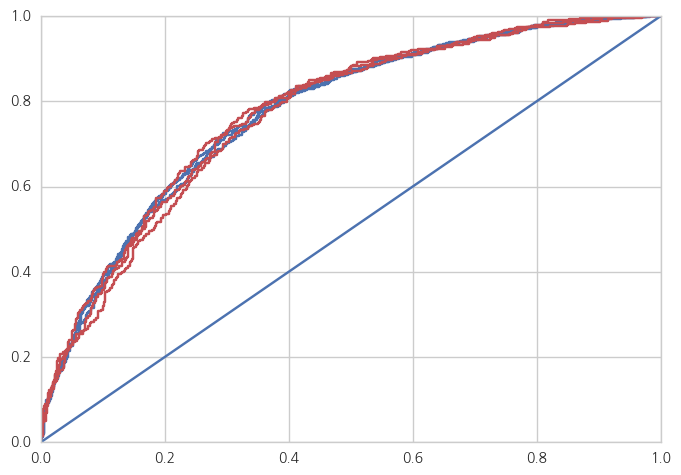

In [55]:
plt.plot(y_logistic2_f0_tr_fpr, y_logistic2_f0_tr_tpr, color='b')
plt.plot(y_logistic2_f1_tr_fpr, y_logistic2_f1_tr_tpr, color='b')
plt.plot(y_logistic2_f2_tr_fpr, y_logistic2_f2_tr_tpr, color='b')
plt.plot(y_logistic2_f0_fpr, y_logistic2_f0_tpr, color='r')
plt.plot(y_logistic2_f1_fpr, y_logistic2_f1_tpr, color='r')
plt.plot(y_logistic2_f2_fpr, y_logistic2_f2_tpr, color='r')
plt.plot([0, 1], [0, 1])
plt.show()

In [17]:
kick_logistic2_features_corr = kick_logistic2_features[[u'period', u'slug', u'backed', u'created', u'img', u'text', 
                                                        u'goal_ex', u'tier_count', u'tier_min_ex', u'tier_median_ex']].corr()

kick_logistic2_features_corr

,period,slug,backed,created,img,text,goal_ex,tier_count,tier_min_ex,tier_median_ex
period,1.000000,-0.013340,-0.056102,-0.099768,-0.026867,-0.028945,0.079468,-0.047409,0.007748,0.040963
slug,-0.013340,1.000000,0.037702,0.030566,0.139787,0.130753,-0.019810,0.116647,-0.011969,0.021688
backed,-0.056102,0.037702,1.000000,0.315073,0.169909,0.150349,-0.015883,0.112467,-0.029368,-0.040882
created,-0.099768,0.030566,0.315073,1.000000,0.083464,0.043103,-0.016999,0.063010,-0.014578,-0.037186
img,-0.026867,0.139787,0.169909,0.083464,1.000000,0.527059,0.017521,0.322015,-0.027532,0.051492
text,-0.028945,0.130753,0.150349,0.043103,0.527059,1.000000,0.039396,0.356371,-0.034821,0.054413
goal_ex,0.079468,-0.019810,-0.015883,-0.016999,0.017521,0.039396,1.000000,0.020957,0.028481,0.080072
tier_count,-0.047409,0.116647,0.112467,0.063010,0.322015,0.356371,0.020957,1.000000,-0.105654,0.021677
tier_min_ex,0.007748,-0.011969,-0.029368,-0.014578,-0.027532,-0.034821,0.028481,-0.105654,1.000000,0.560889
tier_median_ex,0.040963,0.021688,-0.040882,-0.037186,0.051492,0.054413,0.080072,0.021677,0.560889,1.000000


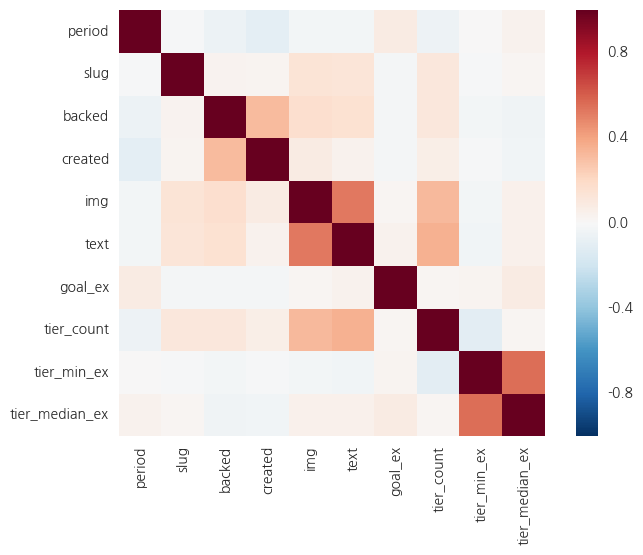

In [18]:
sns.heatmap(kick_logistic2_features_corr, square=True)

In [19]:
# 3. 다중공선성의 제거 1. tier_median_ex 변수 제거
kick_logistic3_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img', u'text',
       u'video', u'goal_ex', u'tier_count', u'tier_min_ex', u'eng_country']]
kick_logistic3_target = kickstart1['goal_achievement']

In [20]:
import statsmodels.api as sm
kick_logistic3_features = sm.add_constant(kick_logistic3_features)

In [21]:
X_train3_list = []
X_test3_list = []
y_train3_list = []
y_test3_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_logistic3_target, n_iter=3, test_size=0.3, random_state=10):
    X_train3_list.append(kick_logistic3_features.ix[train_idx])
    X_test3_list.append(kick_logistic3_features.ix[test_idx])
    y_train3_list.append(kick_logistic3_target.ix[train_idx])
    y_test3_list.append(kick_logistic3_target.ix[test_idx])

In [22]:
logistic3_f0 = sm.Logit(y_train3_list[0], X_train3_list[0]).fit()
logistic3_f1 = sm.Logit(y_train3_list[1], X_train3_list[1]).fit()
logistic3_f2 = sm.Logit(y_train3_list[2], X_train3_list[2]).fit()

Optimization terminated successfully.
         Current function value: 0.579329
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.582672
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.577951
         Iterations 8


In [23]:
logistic3_f0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2558
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Mar 2017   Pseudo R-squ.:                  0.1636
Time:                        13:54:19   Log-Likelihood:                -1488.9
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                8.105e-118
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9400      0.260     -3.616      0.000      -1.450      -0.430
period         -0.0278      0.004     -6.705      0.000      -0.036      -0.020
slug           -0.0035      0.003     -0.998      0.318      -0.010       0.003
backed          0.0156      0.004      4.223      0.000       0.008       0.023
created         0.0837      0.029      2.901      0.004       0.027       0.140
img             0.0187      0.004      4.889      0.000       0.011       0.026
text         2.277e-05    1.5e-05      1.517      0.129   -6.65e-06    5.22e-05
video           0.4842      0.123      3.930      0.000       0.243       0.726
goal_ex     -1.885e-05   2.24e-06     -8.433      0.000   -2.32e-05   -1.45e-05
tier_count      0.0978      0.010      9.806      0.000       0.078       0.117
tier_min_ex -8.451e-06      0.001     -0.014      0.989      -0.001       0.001
eng_country     0.5468      0.152      3.607      0.000       0.250       0.844
===============================================================================
"""

In [24]:
logistic3_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2558
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Mar 2017   Pseudo R-squ.:                  0.1588
Time:                        13:54:19   Log-Likelihood:                -1497.5
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                3.813e-114
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1257      0.262     -4.294      0.000      -1.640      -0.612
period         -0.0279      0.004     -6.765      0.000      -0.036      -0.020
slug            0.0001      0.003      0.038      0.970      -0.007       0.007
backed          0.0159      0.004      4.083      0.000       0.008       0.023
created         0.1034      0.032      3.276      0.001       0.042       0.165
img             0.0191      0.004      5.044      0.000       0.012       0.027
text         1.615e-05   1.43e-05      1.132      0.257   -1.18e-05    4.41e-05
video           0.4963      0.125      3.966      0.000       0.251       0.742
goal_ex     -1.466e-05   2.02e-06     -7.272      0.000   -1.86e-05   -1.07e-05
tier_count      0.0928      0.010      9.453      0.000       0.074       0.112
tier_min_ex    -0.0006      0.001     -0.959      0.338      -0.002       0.001
eng_country     0.5588      0.153      3.652      0.000       0.259       0.859
===============================================================================
"""

In [25]:
logistic3_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2558
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Mar 2017   Pseudo R-squ.:                  0.1656
Time:                        13:54:19   Log-Likelihood:                -1485.3
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                2.479e-119
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2440      0.262     -4.751      0.000      -1.757      -0.731
period         -0.0260      0.004     -6.176      0.000      -0.034      -0.018
slug           -0.0007      0.003     -0.206      0.837      -0.008       0.006
backed          0.0113      0.004      3.181      0.001       0.004       0.018
created         0.1073      0.032      3.370      0.001       0.045       0.170
img             0.0230      0.004      5.982      0.000       0.015       0.031
text         1.767e-05   1.49e-05      1.183      0.237   -1.16e-05    4.69e-05
video           0.5376      0.123      4.359      0.000       0.296       0.779
goal_ex     -1.645e-05   2.06e-06     -7.999      0.000   -2.05e-05   -1.24e-05
tier_count      0.0989      0.010      9.913      0.000       0.079       0.118
tier_min_ex    -0.0005      0.001     -0.905      0.365      -0.002       0.001
eng_country     0.5624      0.153      3.667      0.000       0.262       0.863
===============================================================================
"""

In [27]:
logistic3_f0_pred = (logistic3_f0.predict(X_test3_list[0]) > 0.5)
logistic3_f1_pred = (logistic3_f1.predict(X_test3_list[1]) > 0.5)
logistic3_f2_pred = (logistic3_f2.predict(X_test3_list[2]) > 0.5)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test3_list[0], logistic3_f0_pred))
print(accuracy_score(y_test3_list[1], logistic3_f1_pred))
print(accuracy_score(y_test3_list[2], logistic3_f2_pred))

0.712341197822
0.705989110708
0.696914700544


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test3_list[0], 
                            logistic3_f0_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test3_list[1], 
                            logistic3_f1_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test3_list[2], 
                            logistic3_f2_pred, 
                            target_names = ["Failure", "Success"]))

             precision    recall  f1-score   support

    Failure       0.72      0.72      0.72       569
    Success       0.70      0.71      0.70       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.70      0.76      0.73       569
    Success       0.71      0.65      0.68       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.70      0.73      0.71       569
    Success       0.69      0.67      0.68       533

avg / total       0.70      0.70      0.70      1102



In [30]:
# 4. 다중공선성의 제거 2. tier_min_ex 변수 제거
kick_logistic4_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img', u'text',
       u'video', u'goal_ex', u'tier_count', u'tier_median_ex', u'eng_country']]
kick_logistic4_target = kickstart1['goal_achievement']

In [31]:
import statsmodels.api as sm
kick_logistic4_features = sm.add_constant(kick_logistic4_features)

In [32]:
X_train4_list = []
X_test4_list = []
y_train4_list = []
y_test4_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_logistic4_target, n_iter=3, test_size=0.3, random_state=10):
    X_train4_list.append(kick_logistic4_features.ix[train_idx])
    X_test4_list.append(kick_logistic4_features.ix[test_idx])
    y_train4_list.append(kick_logistic4_target.ix[train_idx])
    y_test4_list.append(kick_logistic4_target.ix[test_idx])

In [33]:
logistic4_f0 = sm.Logit(y_train4_list[0], X_train4_list[0]).fit()
logistic4_f1 = sm.Logit(y_train4_list[1], X_train4_list[1]).fit()
logistic4_f2 = sm.Logit(y_train4_list[2], X_train4_list[2]).fit()

Optimization terminated successfully.
         Current function value: 0.579290
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.582756
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.577997
         Iterations 8


In [34]:
logistic4_f0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2558
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Mar 2017   Pseudo R-squ.:                  0.1636
Time:                        13:59:16   Log-Likelihood:                -1488.8
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                7.335e-118
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9359      0.259     -3.611      0.000      -1.444      -0.428
period            -0.0278      0.004     -6.695      0.000      -0.036      -0.020
slug              -0.0035      0.003     -0.994      0.320      -0.010       0.003
backed             0.0156      0.004      4.203      0.000       0.008       0.023
created            0.0840      0.029      2.906      0.004       0.027       0.141
img                0.0187      0.004      4.903      0.000       0.011       0.026
text             2.29e-05    1.5e-05      1.526      0.127   -6.51e-06    5.23e-05
video              0.4840      0.123      3.928      0.000       0.243       0.726
goal_ex        -1.861e-05   2.28e-06     -8.161      0.000   -2.31e-05   -1.41e-05
tier_count         0.0978      0.010      9.888      0.000       0.078       0.117
tier_median_ex -9.671e-05      0.000     -0.442      0.658      -0.001       0.000
eng_country        0.5466      0.152      3.606      0.000       0.250       0.844
==================================================================================
"""

In [35]:
logistic4_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2558
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Mar 2017   Pseudo R-squ.:                  0.1586
Time:                        13:59:17   Log-Likelihood:                -1497.7
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                4.718e-114
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1397      0.262     -4.358      0.000      -1.652      -0.627
period            -0.0278      0.004     -6.741      0.000      -0.036      -0.020
slug               0.0002      0.003      0.060      0.953      -0.006       0.007
backed             0.0158      0.004      4.074      0.000       0.008       0.023
created            0.1029      0.032      3.266      0.001       0.041       0.165
img                0.0191      0.004      5.056      0.000       0.012       0.027
text            1.638e-05   1.43e-05      1.149      0.250   -1.16e-05    4.43e-05
video              0.4999      0.125      3.996      0.000       0.255       0.745
goal_ex        -1.442e-05   2.04e-06     -7.063      0.000   -1.84e-05   -1.04e-05
tier_count         0.0941      0.010      9.648      0.000       0.075       0.113
tier_median_ex    -0.0002      0.000     -0.947      0.344      -0.001       0.000
eng_country        0.5606      0.153      3.663      0.000       0.261       0.861
==================================================================================
"""

In [36]:
logistic4_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2558
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Mar 2017   Pseudo R-squ.:                  0.1655
Time:                        13:59:17   Log-Likelihood:                -1485.5
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                2.785e-119
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2558      0.261     -4.807      0.000      -1.768      -0.744
period            -0.0259      0.004     -6.151      0.000      -0.034      -0.018
slug              -0.0007      0.003     -0.191      0.849      -0.007       0.006
backed             0.0112      0.004      3.158      0.002       0.004       0.018
created            0.1072      0.032      3.364      0.001       0.045       0.170
img                0.0230      0.004      6.004      0.000       0.016       0.031
text            1.806e-05   1.49e-05      1.209      0.227   -1.12e-05    4.73e-05
video              0.5412      0.123      4.391      0.000       0.300       0.783
goal_ex        -1.622e-05   2.08e-06     -7.789      0.000   -2.03e-05   -1.21e-05
tier_count         0.1003      0.010     10.120      0.000       0.081       0.120
tier_median_ex    -0.0002      0.000     -0.929      0.353      -0.001       0.000
eng_country        0.5620      0.153      3.663      0.000       0.261       0.863
==================================================================================
"""

In [37]:
logistic4_f0_pred = (logistic4_f0.predict(X_test4_list[0]) > 0.5)
logistic4_f1_pred = (logistic4_f1.predict(X_test4_list[1]) > 0.5)
logistic4_f2_pred = (logistic4_f2.predict(X_test4_list[2]) > 0.5)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test4_list[0], logistic4_f0_pred))
print(accuracy_score(y_test4_list[1], logistic4_f1_pred))
print(accuracy_score(y_test4_list[2], logistic4_f2_pred))

0.710526315789
0.706896551724
0.698729582577


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test4_list[0], 
                            logistic4_f0_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test4_list[1], 
                            logistic4_f1_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test4_list[2], 
                            logistic4_f2_pred, 
                            target_names = ["Failure", "Success"]))

             precision    recall  f1-score   support

    Failure       0.72      0.72      0.72       569
    Success       0.70      0.70      0.70       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.70      0.76      0.73       569
    Success       0.72      0.65      0.68       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.70      0.73      0.71       569
    Success       0.70      0.67      0.68       533

avg / total       0.70      0.70      0.70      1102



In [16]:
# 5. 다중공선성의 제거 3. text 변수 제거
kick_logistic5_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img',
       u'video', u'goal_ex', u'tier_count', u'eng_country']]
kick_logistic5_target = kickstart1['goal_achievement']

In [17]:
import statsmodels.api as sm
kick_logistic5_features = sm.add_constant(kick_logistic5_features)

In [18]:
from sklearn.cross_validation import StratifiedShuffleSplit
X_train5_list = []
X_test5_list = []
y_train5_list = []
y_test5_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_logistic5_target, n_iter=3, test_size=0.3, random_state=10):
    X_train5_list.append(kick_logistic5_features.ix[train_idx])
    X_test5_list.append(kick_logistic5_features.ix[test_idx])
    y_train5_list.append(kick_logistic5_target.ix[train_idx])
    y_test5_list.append(kick_logistic5_target.ix[test_idx])

In [19]:
logistic5_f0 = sm.Logit(y_train5_list[0], X_train5_list[0]).fit()
logistic5_f1 = sm.Logit(y_train5_list[1], X_train5_list[1]).fit()
logistic5_f2 = sm.Logit(y_train5_list[2], X_train5_list[2]).fit()

Optimization terminated successfully.
         Current function value: 0.579780
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.583205
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.578460
         Iterations 8


In [20]:
logistic5_f0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2560
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  0.1629
Time:                        02:25:27   Log-Likelihood:                -1490.0
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                3.923e-119
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9096      0.258     -3.524      0.000      -1.416      -0.404
period         -0.0280      0.004     -6.745      0.000      -0.036      -0.020
slug           -0.0032      0.003     -0.919      0.358      -0.010       0.004
backed          0.0163      0.004      4.398      0.000       0.009       0.024
created         0.0833      0.029      2.894      0.004       0.027       0.140
img             0.0209      0.004      5.893      0.000       0.014       0.028
video           0.4951      0.123      4.028      0.000       0.254       0.736
goal_ex     -1.839e-05   2.19e-06     -8.397      0.000   -2.27e-05   -1.41e-05
tier_count      0.1006      0.010     10.329      0.000       0.082       0.120
eng_country     0.5377      0.151      3.552      0.000       0.241       0.834
===============================================================================
"""

In [21]:
logistic5_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2560
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  0.1580
Time:                        02:25:27   Log-Likelihood:                -1498.8
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                2.340e-115
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1340      0.261     -4.348      0.000      -1.645      -0.623
period         -0.0279      0.004     -6.775      0.000      -0.036      -0.020
slug            0.0003      0.003      0.099      0.921      -0.006       0.007
backed          0.0164      0.004      4.216      0.000       0.009       0.024
created         0.1025      0.031      3.268      0.001       0.041       0.164
img             0.0207      0.004      5.860      0.000       0.014       0.028
video           0.5056      0.125      4.051      0.000       0.261       0.750
goal_ex     -1.451e-05   1.98e-06     -7.320      0.000   -1.84e-05   -1.06e-05
tier_count      0.0962      0.010      9.996      0.000       0.077       0.115
eng_country     0.5601      0.153      3.660      0.000       0.260       0.860
===============================================================================
"""

In [22]:
logistic5_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2560
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  0.1648
Time:                        02:25:28   Log-Likelihood:                -1486.6
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                1.371e-120
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2420      0.260     -4.781      0.000      -1.751      -0.733
period         -0.0261      0.004     -6.209      0.000      -0.034      -0.018
slug           -0.0005      0.003     -0.155      0.877      -0.007       0.006
backed          0.0118      0.004      3.334      0.001       0.005       0.019
created         0.1063      0.032      3.352      0.001       0.044       0.168
img             0.0247      0.004      6.940      0.000       0.018       0.032
video           0.5507      0.123      4.479      0.000       0.310       0.792
goal_ex     -1.627e-05   2.02e-06     -8.038      0.000   -2.02e-05   -1.23e-05
tier_count      0.1026      0.010     10.537      0.000       0.084       0.122
eng_country     0.5565      0.153      3.633      0.000       0.256       0.857
===============================================================================
"""

In [23]:
logistic5_f0_pred = (logistic5_f0.predict(X_test5_list[0]) > 0.5)
logistic5_f1_pred = (logistic5_f1.predict(X_test5_list[1]) > 0.5)
logistic5_f2_pred = (logistic5_f2.predict(X_test5_list[2]) > 0.5)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test5_list[0], logistic5_f0_pred))
print(accuracy_score(y_test5_list[1], logistic5_f1_pred))
print(accuracy_score(y_test5_list[2], logistic5_f2_pred))
print((accuracy_score(y_test5_list[0], logistic5_f0_pred) + \
     accuracy_score(y_test5_list[1], logistic5_f1_pred) + \
     accuracy_score(y_test5_list[2], logistic5_f2_pred))/3)

0.710526315789
0.705989110708
0.694192377495
0.703569267998


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test5_list[0], 
                            logistic5_f0_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test5_list[1], 
                            logistic5_f1_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test5_list[2], 
                            logistic5_f2_pred, 
                            target_names = ["Failure", "Success"]))

             precision    recall  f1-score   support

    Failure       0.72      0.72      0.72       569
    Success       0.70      0.70      0.70       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.70      0.75      0.73       569
    Success       0.71      0.66      0.68       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.69      0.73      0.71       569
    Success       0.69      0.66      0.68       533

avg / total       0.69      0.69      0.69      1102



In [26]:
# 6. 다중공선성의 제거 4. img 변수 제거
kick_logistic6_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'text',
       u'video', u'goal_ex', u'tier_count', u'eng_country']]
kick_logistic6_target = kickstart1['goal_achievement']

In [27]:
import statsmodels.api as sm
kick_logistic6_features = sm.add_constant(kick_logistic6_features)

In [28]:
X_train6_list = []
X_test6_list = []
y_train6_list = []
y_test6_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_logistic6_target, n_iter=3, test_size=0.3, random_state=10):
    X_train6_list.append(kick_logistic6_features.ix[train_idx])
    X_test6_list.append(kick_logistic6_features.ix[test_idx])
    y_train6_list.append(kick_logistic6_target.ix[train_idx])
    y_test6_list.append(kick_logistic6_target.ix[test_idx])

In [29]:
logistic6_f0 = sm.Logit(y_train6_list[0], X_train6_list[0]).fit()
logistic6_f1 = sm.Logit(y_train6_list[1], X_train6_list[1]).fit()
logistic6_f2 = sm.Logit(y_train6_list[2], X_train6_list[2]).fit()

Optimization terminated successfully.
         Current function value: 0.584173
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.588119
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.585642
         Iterations 8


In [30]:
logistic6_f0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2560
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  0.1566
Time:                        02:25:35   Log-Likelihood:                -1501.3
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                2.730e-114
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9798      0.258     -3.804      0.000      -1.485      -0.475
period         -0.0272      0.004     -6.605      0.000      -0.035      -0.019
slug           -0.0020      0.003     -0.586      0.558      -0.009       0.005
backed          0.0174      0.004      4.583      0.000       0.010       0.025
created         0.0924      0.030      3.123      0.002       0.034       0.150
text         5.166e-05   1.39e-05      3.709      0.000    2.44e-05     7.9e-05
video           0.5516      0.122      4.523      0.000       0.313       0.791
goal_ex     -1.741e-05   2.12e-06     -8.210      0.000   -2.16e-05   -1.33e-05
tier_count      0.1029      0.010     10.455      0.000       0.084       0.122
eng_country     0.4505      0.148      3.039      0.002       0.160       0.741
===============================================================================
"""

In [31]:
logistic6_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2560
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  0.1509
Time:                        02:25:35   Log-Likelihood:                -1511.5
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                6.094e-110
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1688      0.260     -4.500      0.000      -1.678      -0.660
period         -0.0274      0.004     -6.717      0.000      -0.035      -0.019
slug            0.0018      0.003      0.538      0.591      -0.005       0.008
backed          0.0182      0.004      4.552      0.000       0.010       0.026
created         0.1099      0.032      3.435      0.001       0.047       0.173
text         4.403e-05   1.33e-05      3.306      0.001    1.79e-05    7.01e-05
video           0.5643      0.124      4.563      0.000       0.322       0.807
goal_ex     -1.364e-05   1.93e-06     -7.081      0.000   -1.74e-05   -9.86e-06
tier_count      0.0999      0.010     10.306      0.000       0.081       0.119
eng_country     0.4551      0.150      3.042      0.002       0.162       0.748
===============================================================================
"""

In [32]:
logistic6_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2560
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  0.1545
Time:                        02:25:36   Log-Likelihood:                -1505.1
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                1.137e-112
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2902      0.258     -4.993      0.000      -1.797      -0.784
period         -0.0253      0.004     -6.080      0.000      -0.033      -0.017
slug            0.0011      0.003      0.310      0.757      -0.006       0.008
backed          0.0137      0.004      3.712      0.000       0.006       0.021
created         0.1148      0.032      3.540      0.000       0.051       0.178
text         5.434e-05   1.39e-05      3.911      0.000    2.71e-05    8.16e-05
video           0.6247      0.122      5.141      0.000       0.387       0.863
goal_ex     -1.558e-05   1.97e-06     -7.921      0.000   -1.94e-05   -1.17e-05
tier_count      0.1056      0.010     10.730      0.000       0.086       0.125
eng_country     0.4469      0.149      2.992      0.003       0.154       0.740
===============================================================================
"""

In [33]:
logistic6_f0_pred = (logistic6_f0.predict(X_test6_list[0]) > 0.5)
logistic6_f1_pred = (logistic6_f1.predict(X_test6_list[1]) > 0.5)
logistic6_f2_pred = (logistic6_f2.predict(X_test6_list[2]) > 0.5)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test6_list[0], logistic6_f0_pred))
print(accuracy_score(y_test6_list[1], logistic6_f1_pred))
print(accuracy_score(y_test6_list[2], logistic6_f2_pred))
print((accuracy_score(y_test6_list[0], logistic6_f0_pred) + \
     accuracy_score(y_test6_list[1], logistic6_f1_pred) + \
     accuracy_score(y_test6_list[2], logistic6_f2_pred))/3)

0.698729582577
0.704174228675
0.686025408348
0.696309739867


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test6_list[0], 
                            logistic6_f0_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test6_list[1], 
                            logistic6_f1_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test6_list[2], 
                            logistic6_f2_pred, 
                            target_names = ["Failure", "Success"]))

             precision    recall  f1-score   support

    Failure       0.71      0.71      0.71       569
    Success       0.69      0.69      0.69       533

avg / total       0.70      0.70      0.70      1102

             precision    recall  f1-score   support

    Failure       0.70      0.76      0.73       569
    Success       0.71      0.65      0.68       533

avg / total       0.70      0.70      0.70      1102

             precision    recall  f1-score   support

    Failure       0.69      0.72      0.70       569
    Success       0.68      0.65      0.67       533

avg / total       0.69      0.69      0.69      1102



In [91]:
(logistic5_f0.aic+logistic5_f1.aic+logistic5_f2.aic) / 3, (logistic6_f0.aic + logistic6_f1.aic + logistic6_f2.aic) / 3

(3003.6758287272728, 3031.9282520703109)

In [92]:
(logistic5_f0.bic+logistic5_f1.bic+logistic5_f2.bic) / 3, (logistic6_f0.bic + logistic6_f1.bic + logistic6_f2.bic) / 3

(3062.1924405061654, 3090.4448638492036)

In [93]:
(logistic5_f0.prsquared+logistic5_f1.prsquared+logistic5_f2.prsquared) / 3, (logistic6_f0.prsquared + logistic6_f1.prsquared + logistic6_f2.prsquared) / 3

(0.1619264128363537, 0.15399069490440073)

In [50]:
print((accuracy_score(y_test5_list[0], logistic5_f0_pred) + \
     accuracy_score(y_test5_list[1], logistic5_f1_pred) + \
     accuracy_score(y_test5_list[2], logistic5_f2_pred))/3)
print((accuracy_score(y_test6_list[0], logistic6_f0_pred) + \
     accuracy_score(y_test6_list[1], logistic6_f1_pred) + \
     accuracy_score(y_test6_list[2], logistic6_f2_pred))/3)

0.703569267998
0.696309739867


In [29]:
# 7. img, text 변수 중 performance가 좋은 img 변수를 선택, 유의하지 않은 변수인 slug 변수를 제거
kick_logistic7_features = kickstart1[[u'period', u'backed', u'created', u'img',
       u'video', u'goal_ex', u'tier_count', u'eng_country']]
kick_logistic7_target = kickstart1['goal_achievement']

In [30]:
import statsmodels.api as sm
kick_logistic7_features = sm.add_constant(kick_logistic7_features)

In [31]:
X_train7_list = []
X_test7_list = []
y_train7_list = []
y_test7_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_logistic7_target, n_iter=3, test_size=0.3, random_state=10):
    X_train7_list.append(kick_logistic7_features.ix[train_idx])
    X_test7_list.append(kick_logistic7_features.ix[test_idx])
    y_train7_list.append(kick_logistic7_target.ix[train_idx])
    y_test7_list.append(kick_logistic7_target.ix[test_idx])

In [32]:
logistic7_f0 = sm.Logit(y_train7_list[0], X_train7_list[0]).fit()
logistic7_f1 = sm.Logit(y_train7_list[1], X_train7_list[1]).fit()
logistic7_f2 = sm.Logit(y_train7_list[2], X_train7_list[2]).fit()

Optimization terminated successfully.
         Current function value: 0.579945
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.583207
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.578464
         Iterations 8


In [33]:
logistic7_f0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2561
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Mar 2017   Pseudo R-squ.:                  0.1627
Time:                        11:47:34   Log-Likelihood:                -1490.5
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                6.773e-120
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0050      0.236     -4.251      0.000      -1.468      -0.542
period         -0.0280      0.004     -6.751      0.000      -0.036      -0.020
backed          0.0164      0.004      4.412      0.000       0.009       0.024
created         0.0834      0.029      2.897      0.004       0.027       0.140
img             0.0205      0.004      5.836      0.000       0.014       0.027
video           0.4925      0.123      4.008      0.000       0.252       0.733
goal_ex     -1.841e-05   2.19e-06     -8.405      0.000   -2.27e-05   -1.41e-05
tier_count      0.1000      0.010     10.298      0.000       0.081       0.119
eng_country     0.5346      0.151      3.533      0.000       0.238       0.831
===============================================================================
"""

In [34]:
logistic7_f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2561
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Mar 2017   Pseudo R-squ.:                  0.1580
Time:                        11:47:35   Log-Likelihood:                -1498.8
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                2.713e-116
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1242      0.241     -4.667      0.000      -1.596      -0.652
period         -0.0279      0.004     -6.775      0.000      -0.036      -0.020
backed          0.0164      0.004      4.216      0.000       0.009       0.024
created         0.1026      0.031      3.269      0.001       0.041       0.164
img             0.0207      0.004      5.915      0.000       0.014       0.028
video           0.5057      0.125      4.051      0.000       0.261       0.750
goal_ex      -1.45e-05   1.98e-06     -7.320      0.000   -1.84e-05   -1.06e-05
tier_count      0.0963      0.010     10.032      0.000       0.077       0.115
eng_country     0.5606      0.153      3.666      0.000       0.261       0.860
===============================================================================
"""

In [35]:
logistic7_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       goal_achievement   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2561
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Mar 2017   Pseudo R-squ.:                  0.1648
Time:                        11:47:35   Log-Likelihood:                -1486.7
converged:                       True   LL-Null:                       -1780.1
                                        LLR p-value:                1.568e-121
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2572      0.240     -5.230      0.000      -1.728      -0.786
period         -0.0261      0.004     -6.214      0.000      -0.034      -0.018
backed          0.0118      0.004      3.335      0.001       0.005       0.019
created         0.1062      0.032      3.350      0.001       0.044       0.168
img             0.0246      0.004      6.966      0.000       0.018       0.032
video           0.5502      0.123      4.476      0.000       0.309       0.791
goal_ex     -1.627e-05   2.02e-06     -8.038      0.000   -2.02e-05   -1.23e-05
tier_count      0.1025      0.010     10.553      0.000       0.083       0.122
eng_country     0.5560      0.153      3.630      0.000       0.256       0.856
===============================================================================
"""

In [36]:
logistic7_f0_pred = (logistic7_f0.predict(X_test7_list[0]) > 0.5)
logistic7_f1_pred = (logistic7_f1.predict(X_test7_list[1]) > 0.5)
logistic7_f2_pred = (logistic7_f2.predict(X_test7_list[2]) > 0.5)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test7_list[0], logistic7_f0_pred))
print(accuracy_score(y_test7_list[1], logistic7_f1_pred))
print(accuracy_score(y_test7_list[2], logistic7_f2_pred))
print((accuracy_score(y_test7_list[0], logistic7_f0_pred) +\
      accuracy_score(y_test7_list[1], logistic7_f1_pred) +\
      accuracy_score(y_test7_list[2], logistic7_f2_pred))/3)

0.702359346642
0.706896551724
0.694192377495
0.701149425287


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test7_list[0], 
                            logistic7_f0_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test7_list[1], 
                            logistic7_f1_pred, 
                            target_names = ["Failure", "Success"]))
print(classification_report(y_test7_list[2], 
                            logistic7_f2_pred, 
                            target_names = ["Failure", "Success"]))

             precision    recall  f1-score   support

    Failure       0.71      0.71      0.71       569
    Success       0.69      0.69      0.69       533

avg / total       0.70      0.70      0.70      1102

             precision    recall  f1-score   support

    Failure       0.70      0.75      0.73       569
    Success       0.71      0.66      0.68       533

avg / total       0.71      0.71      0.71      1102

             precision    recall  f1-score   support

    Failure       0.69      0.73      0.71       569
    Success       0.69      0.66      0.68       533

avg / total       0.69      0.69      0.69      1102



In [43]:
from sklearn.metrics import roc_curve
y_logistic7_f0_tr_fpr, y_logistic7_f0_tr_tpr, y_logistic7_f0_tr_thresholds = roc_curve(y_train7_list[0], logistic7_f0.predict(X_train7_list[0]))
y_logistic7_f1_tr_fpr, y_logistic7_f1_tr_tpr, y_logistic7_f1_tr_thresholds = roc_curve(y_train7_list[1], logistic7_f1.predict(X_train7_list[1]))
y_logistic7_f2_tr_fpr, y_logistic7_f2_tr_tpr, y_logistic7_f2_tr_thresholds = roc_curve(y_train2_list[2], logistic7_f2.predict(X_train7_list[2]))
y_logistic7_f0_fpr, y_logistic7_f0_tpr, y_logistic7_f0_thresholds = roc_curve(y_test7_list[0], logistic7_f0.predict(X_test7_list[0]))
y_logistic7_f1_fpr, y_logistic7_f1_tpr, y_logistic7_f1_thresholds = roc_curve(y_test7_list[1], logistic7_f1.predict(X_test7_list[1]))
y_logistic7_f2_fpr, y_logistic7_f2_tpr, y_logistic7_f2_thresholds = roc_curve(y_test7_list[2], logistic7_f2.predict(X_test7_list[2]))

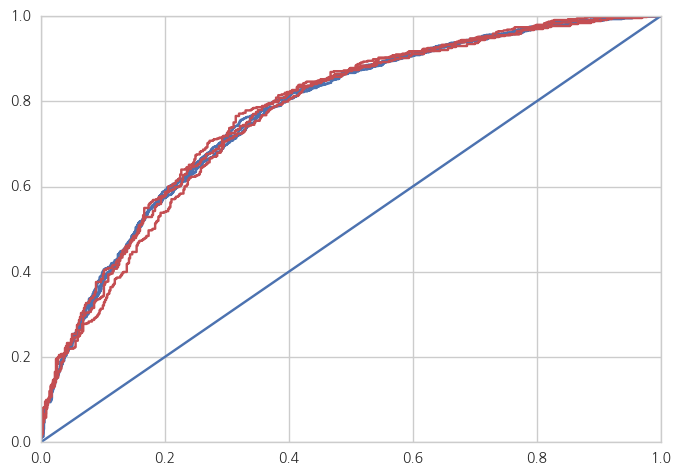

In [44]:
plt.plot(y_logistic7_f0_tr_fpr, y_logistic7_f0_tr_tpr, color='b')
plt.plot(y_logistic7_f1_tr_fpr, y_logistic7_f1_tr_tpr, color='b')
plt.plot(y_logistic7_f2_tr_fpr, y_logistic7_f2_tr_tpr, color='b')
plt.plot(y_logistic7_f0_fpr, y_logistic7_f0_tpr, color='r')
plt.plot(y_logistic7_f1_fpr, y_logistic7_f1_tpr, color='r')
plt.plot(y_logistic7_f2_fpr, y_logistic7_f2_tpr, color='r')
plt.plot([0, 1], [0, 1])
plt.show()

### 분석 2. 프로젝트 성공여부의 분류 (Random Forest)

In [2]:
# 의사결정나무 시각화 함수
import StringIO
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
def draw_tree(classifier, feature_names):
    dot_buf = StringIO.StringIO()
    export_graphviz(classifier, 
                    out_file=dot_buf, 
                    feature_names = feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
erf_c = ExtraTreesClassifier(criterion = 'entropy',
                             n_estimators = 1000,
                             random_state = 10)

In [6]:
kick_tree_c_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img', u'text',
       u'video', u'goal_ex', u'tier_count', u'tier_min_ex', u'tier_median_ex', u'eng_country', u'category_art',
       u'category_comics', u'category_crafts', u'category_dance',
       u'category_design', u'category_fashion', u'category_film & video',
       u'category_food', u'category_games', u'category_journalism',
       u'category_music', u'category_photography', u'category_publishing',
       u'category_technology', u'category_theater']]
kick_tree_c_target = kickstart1['goal_achievement']

In [7]:
erf_c.fit(kick_tree_c_features, kick_tree_c_target)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=10,
           verbose=0, warm_start=False)

In [8]:
pd.DataFrame(erf_c.feature_importances_, 
             index = kick_tree_c_features.columns,
             columns = ["Feature_Importance"]).sort(['Feature_Importance'], ascending=[0])

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Feature_Importance
tier_count,0.105797
goal_ex,0.103311
backed,0.091312
img,0.090640
text,0.089230
period,0.083439
tier_median_ex,0.081632
slug,0.078549
tier_min_ex,0.074799
created,0.046993


In [47]:
kick_tree_c2_features = kickstart1[[u'period', u'slug', u'backed', u'img',
                                    u'text', u'goal_ex', u'tier_count', 
                                    u'tier_min_ex', u'tier_median_ex']]
kick_tree_c2_target = kickstart1['goal_achievement']

In [48]:
X_train2_list = []
X_test2_list = []
y_train2_list = []
y_test2_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_tree_c2_target, n_iter=3, test_size=0.3, random_state=10):
    X_train2_list.append(kick_tree_c2_features.ix[train_idx])
    X_test2_list.append(kick_tree_c2_features.ix[test_idx])
    y_train2_list.append(kick_tree_c2_target.ix[train_idx])
    y_test2_list.append(kick_tree_c2_target.ix[test_idx])

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree_c2_f0 = DecisionTreeClassifier(criterion = 'entropy', 
                                   max_depth = 5,
                                   random_state = 10).fit(X_train2_list[0],
                                                          y_train2_list[0])
tree_c2_f1 = DecisionTreeClassifier(criterion = 'entropy', 
                                   max_depth = 5,
                                   random_state = 10).fit(X_train2_list[1],
                                                          y_train2_list[1])
tree_c2_f2 = DecisionTreeClassifier(criterion = 'entropy', 
                                   max_depth = 5,
                                   random_state = 10).fit(X_train2_list[2],
                                                          y_train2_list[2])

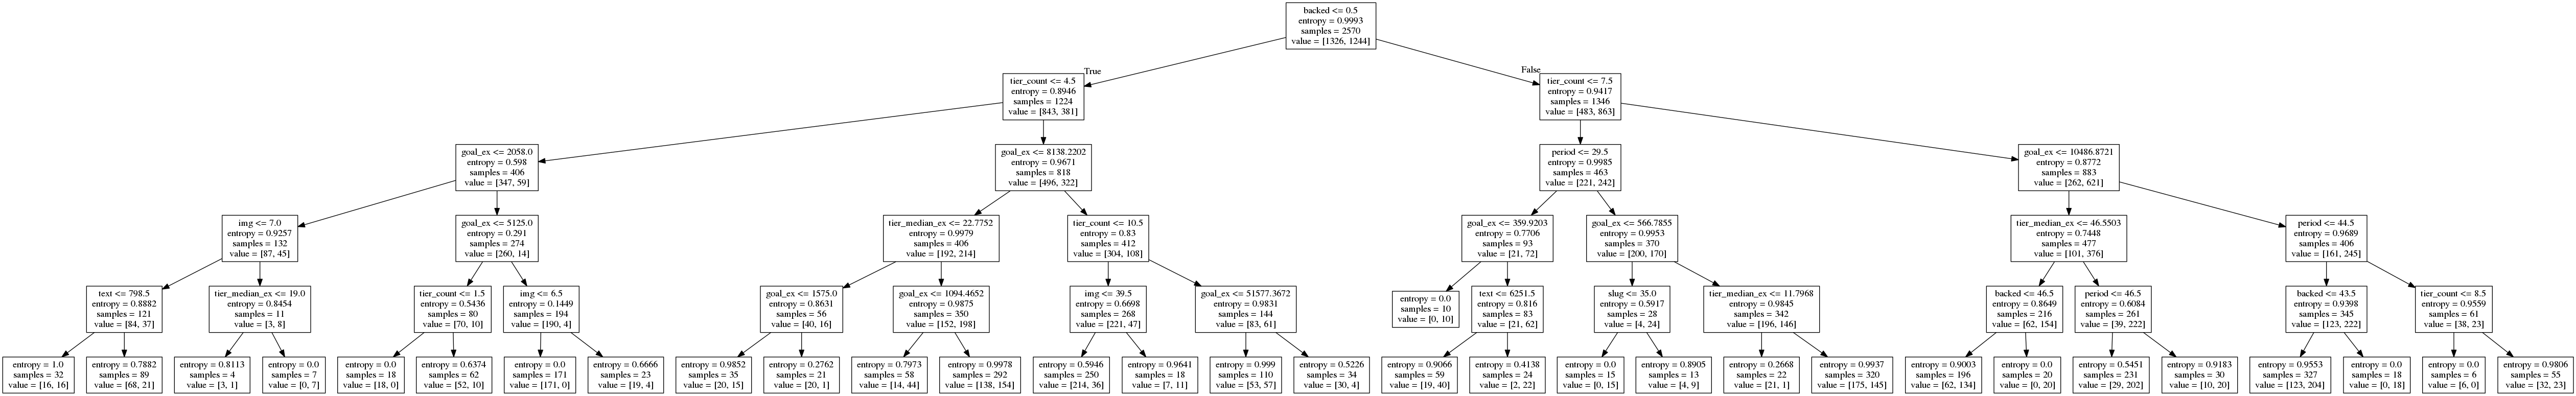

In [13]:
draw_tree(classifier = tree_c2_f0, 
          feature_names = X_train2_list[0].columns)

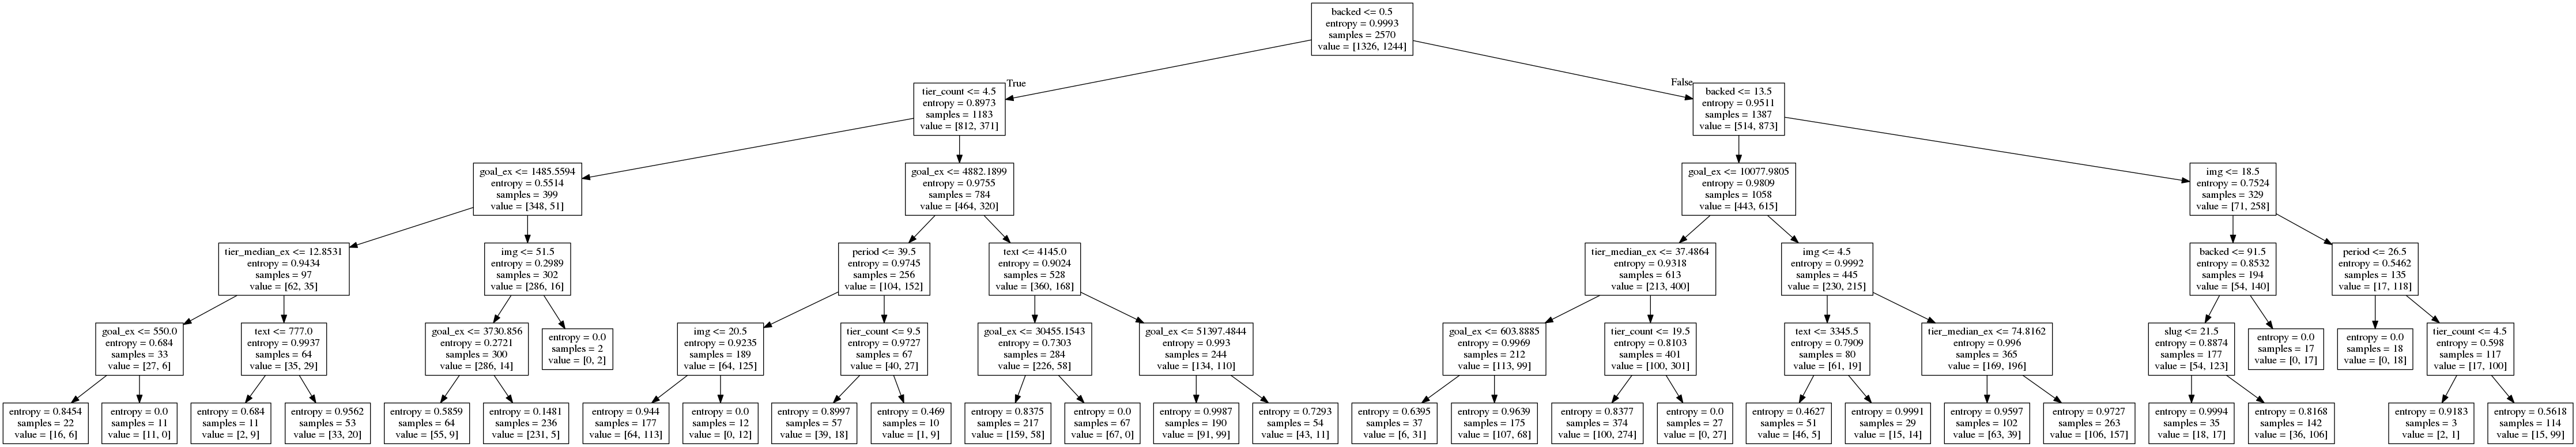

In [14]:
draw_tree(classifier = tree_c2_f1, 
          feature_names = X_train2_list[1].columns)

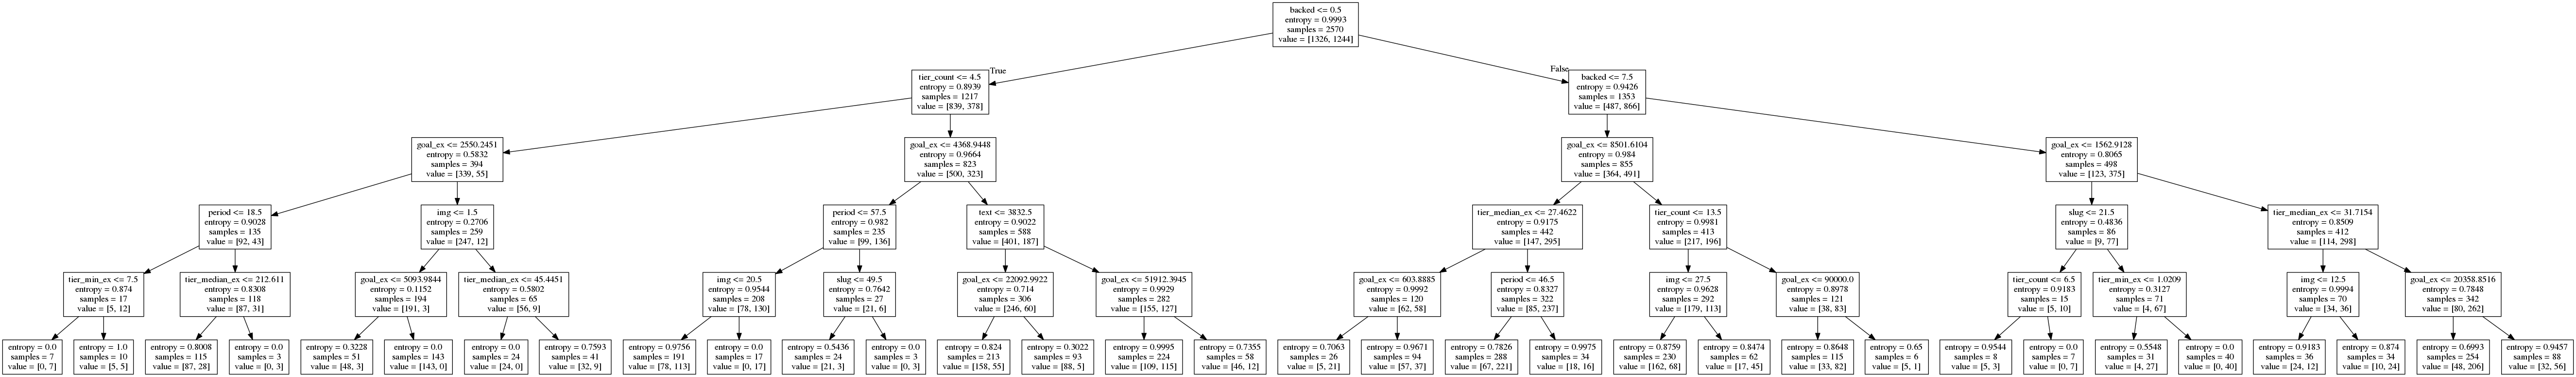

In [15]:
draw_tree(classifier = tree_c2_f2, 
          feature_names = X_train2_list[2].columns)

In [196]:
print(tree_c2_f0.score(X_test2_list[0], y_test2_list[0]))
print(tree_c2_f1.score(X_test2_list[1], y_test2_list[1]))
print(tree_c2_f2.score(X_test2_list[2], y_test2_list[2]))

0.65335753176
0.664246823956
0.669691470054


In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_test2_list[0], 
                            tree_c2_f0.predict(X_test2_list[0]),
                            target_names = ['Failure', 
                                             'Success']))
print(classification_report(y_test2_list[1], 
                            tree_c2_f1.predict(X_test2_list[1]),
                            target_names = ['Failure', 
                                             'Success']))
print(classification_report(y_test2_list[2], 
                            tree_c2_f2.predict(X_test2_list[2]),
                            target_names = ['Failure', 
                                             'Success']))

             precision    recall  f1-score   support

    Failure       0.69      0.59      0.64       569
    Success       0.62      0.72      0.67       533

avg / total       0.66      0.65      0.65      1102

             precision    recall  f1-score   support

    Failure       0.68      0.66      0.67       569
    Success       0.65      0.67      0.66       533

avg / total       0.66      0.66      0.66      1102

             precision    recall  f1-score   support

    Failure       0.70      0.63      0.66       569
    Success       0.64      0.72      0.68       533

avg / total       0.67      0.67      0.67      1102



In [51]:
from sklearn.metrics import roc_curve
y_tree_c2_f0_tr_fpr, y_tree_c2_f0_tr_tpr, y_tree_c2_f0_tr_thresholds = roc_curve(y_train2_list[0], tree_c2_f0.predict(X_train2_list[0]))
y_tree_c2_f1_tr_fpr, y_tree_c2_f1_tr_tpr, y_tree_c2_f1_tr_thresholds = roc_curve(y_train2_list[1], tree_c2_f1.predict(X_train2_list[1]))
y_tree_c2_f2_tr_fpr, y_tree_c2_f2_tr_tpr, y_tree_c2_f2_tr_thresholds = roc_curve(y_train2_list[2], tree_c2_f2.predict(X_train2_list[2]))
y_tree_c2_f0_fpr, y_tree_c2_f0_tpr, y_tree_c2_f0_thresholds = roc_curve(y_test2_list[0], tree_c2_f0.predict(X_test2_list[0]))
y_tree_c2_f1_fpr, y_tree_c2_f1_tpr, y_tree_c2_f1_thresholds = roc_curve(y_test2_list[1], tree_c2_f1.predict(X_test2_list[1]))
y_tree_c2_f2_fpr, y_tree_c2_f2_tpr, y_tree_c2_f2_thresholds = roc_curve(y_test2_list[2], tree_c2_f2.predict(X_test2_list[2]))

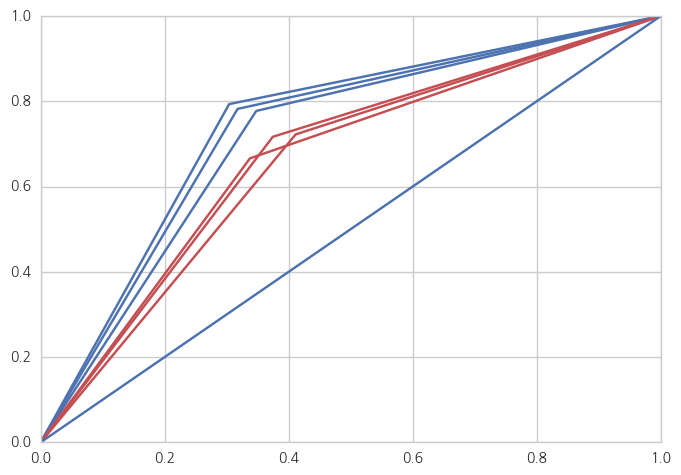

In [52]:
plt.plot(y_tree_c2_f0_tr_fpr, y_tree_c2_f0_tr_tpr, color='b')
plt.plot(y_tree_c2_f1_tr_fpr, y_tree_c2_f1_tr_tpr, color='b')
plt.plot(y_tree_c2_f2_tr_fpr, y_tree_c2_f2_tr_tpr, color='b')
plt.plot(y_tree_c2_f0_fpr, y_tree_c2_f0_tpr, color='r')
plt.plot(y_tree_c2_f1_fpr, y_tree_c2_f1_tpr, color='r')
plt.plot(y_tree_c2_f2_fpr, y_tree_c2_f2_tpr, color='r')
plt.plot([0, 1], [0, 1])
plt.show()

### 분석 3. 프로젝트 성공여부의 분류 (Perceptron)

In [14]:
kick_pctr_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img', u'text', u'goal_ex', u'tier_count', u'tier_min_ex',
       u'tier_median_ex']]
kick_pctr_target = kickstart1['goal_achievement']

In [15]:
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_pctr_target, n_iter=3, test_size=0.3, random_state=10):
    X_train_list.append(kick_pctr_features.ix[train_idx])
    X_test_list.append(kick_pctr_features.ix[test_idx])
    y_train_list.append(kick_pctr_target.ix[train_idx])
    y_test_list.append(kick_pctr_target.ix[test_idx])

In [16]:
from sklearn.linear_model import Perceptron
pctr_f0 = Perceptron(n_iter=100000, eta0=0.000001, random_state=10).fit(X_train_list[0], y_train_list[0])
pctr_f1 = Perceptron(n_iter=100000, eta0=0.000001, random_state=10).fit(X_train_list[1], y_train_list[1])
pctr_f2 = Perceptron(n_iter=100000, eta0=0.000001, random_state=10).fit(X_train_list[2], y_train_list[2])

In [17]:
print(pctr_f0.score(X_test_list[0], y_test_list[0]))
print(pctr_f1.score(X_test_list[1], y_test_list[1]))
print(pctr_f2.score(X_test_list[2], y_test_list[2]))
print( (pctr_f0.score(X_test_list[0], y_test_list[0]) + \
       pctr_f0.score(X_test_list[0], y_test_list[0]) + \
       pctr_f0.score(X_test_list[0], y_test_list[0])) / 3 )

0.701451905626
0.552631578947
0.580762250454
0.701451905626


In [18]:
pctr_f0_pred = pctr_f0.predict(X_test_list[0])
pctr_f1_pred = pctr_f1.predict(X_test_list[1])
pctr_f2_pred = pctr_f2.predict(X_test_list[2])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test_list[0], 
                      pctr_f0_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test_list[1], 
                      pctr_f1_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test_list[2], 
                      pctr_f2_pred, 
                      target_names = ['Failure', 'Success']))

             precision    recall  f1-score   support

    Failure       0.70      0.73      0.72       569
    Success       0.70      0.67      0.68       533

avg / total       0.70      0.70      0.70      1102

             precision    recall  f1-score   support

    Failure       0.54      0.98      0.69       569
    Success       0.81      0.10      0.17       533

avg / total       0.67      0.55      0.44      1102

             precision    recall  f1-score   support

    Failure       0.56      0.88      0.68       569
    Success       0.67      0.26      0.37       533

avg / total       0.61      0.58      0.53      1102



In [20]:
kick_pctr2_features = kickstart1[[u'period', u'backed', u'created',  u'goal_ex', u'tier_count']]
kick_pctr2_target = kickstart1['goal_achievement']

In [21]:
X_train2_list = []
X_test2_list = []
y_train2_list = []
y_test2_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_pctr2_target, n_iter=3, test_size=0.3, random_state=10):
    X_train2_list.append(kick_pctr2_features.ix[train_idx])
    X_test2_list.append(kick_pctr2_features.ix[test_idx])
    y_train2_list.append(kick_pctr2_target.ix[train_idx])
    y_test2_list.append(kick_pctr2_target.ix[test_idx])

In [22]:
from sklearn.linear_model import Perceptron
pctr2_f0 = Perceptron(n_iter=100000, eta0=0.0000001, random_state=10).fit(X_train2_list[0], y_train2_list[0])
pctr2_f1 = Perceptron(n_iter=100000, eta0=0.0000001, random_state=10).fit(X_train2_list[1], y_train2_list[1])
pctr2_f2 = Perceptron(n_iter=100000, eta0=0.0000001, random_state=10).fit(X_train2_list[2], y_train2_list[2])

In [23]:
print(pctr2_f0.score(X_test2_list[0], y_test2_list[0]))
print(pctr2_f1.score(X_test2_list[1], y_test2_list[1]))
print(pctr2_f2.score(X_test2_list[2], y_test2_list[2]))
print( (pctr2_f0.score(X_test2_list[0], y_test2_list[0]) + \
       pctr2_f0.score(X_test2_list[0], y_test2_list[0]) + \
       pctr2_f0.score(X_test2_list[0], y_test2_list[0])) / 3 )

0.68058076225
0.679673321234
0.69056261343
0.68058076225


In [24]:
pctr2_f0_pred = pctr2_f0.predict(X_test2_list[0])
pctr2_f1_pred = pctr2_f1.predict(X_test2_list[1])
pctr2_f2_pred = pctr2_f2.predict(X_test2_list[2])

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test2_list[0], 
                      pctr2_f0_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test2_list[1], 
                      pctr2_f1_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test2_list[2], 
                      pctr2_f2_pred, 
                      target_names = ['Failure', 'Success']))

             precision    recall  f1-score   support

    Failure       0.74      0.58      0.65       569
    Success       0.64      0.78      0.70       533

avg / total       0.69      0.68      0.68      1102

             precision    recall  f1-score   support

    Failure       0.74      0.59      0.66       569
    Success       0.64      0.77      0.70       533

avg / total       0.69      0.68      0.68      1102

             precision    recall  f1-score   support

    Failure       0.71      0.68      0.69       569
    Success       0.67      0.70      0.69       533

avg / total       0.69      0.69      0.69      1102



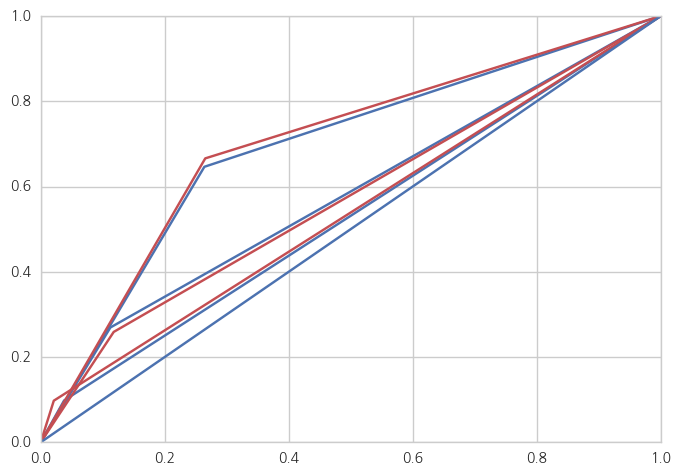

In [27]:
from sklearn.metrics import roc_curve
y_pctr_tr_f0_fpr, y_pctr_tr_f0_tpr, y_pctr_tr_f0_thresholds = roc_curve(y_train_list[0], pctr_f0.predict(X_train_list[0])) 
y_pctr_tr_f1_fpr, y_pctr_tr_f1_tpr, y_pctr_tr_f1_thresholds = roc_curve(y_train_list[1], pctr_f1.predict(X_train_list[1])) 
y_pctr_tr_f2_fpr, y_pctr_tr_f2_tpr, y_pctr_tr_f2_thresholds = roc_curve(y_train_list[2], pctr_f2.predict(X_train_list[2]))
y_pctr_f0_fpr, y_pctr_f0_tpr, y_pctr_f0_thresholds = roc_curve(y_test_list[0], pctr_f0.predict(X_test_list[0])) 
y_pctr_f1_fpr, y_pctr_f1_tpr, y_pctr_f1_thresholds = roc_curve(y_test_list[1], pctr_f1.predict(X_test_list[1])) 
y_pctr_f2_fpr, y_pctr_f2_tpr, y_pctr_f2_thresholds = roc_curve(y_test_list[2], pctr_f2.predict(X_test_list[2])) 
plt.plot(y_pctr_tr_f0_fpr, y_pctr_tr_f0_tpr, color='b')
plt.plot(y_pctr_tr_f1_fpr, y_pctr_tr_f1_tpr, color='b')
plt.plot(y_pctr_tr_f2_fpr, y_pctr_tr_f2_tpr, color='b')
plt.plot(y_pctr_f0_fpr, y_pctr_f0_tpr, color='r')
plt.plot(y_pctr_f1_fpr, y_pctr_f1_tpr, color='r')
plt.plot(y_pctr_f2_fpr, y_pctr_f2_tpr, color='r')
plt.plot([0, 1], [0, 1])
plt.show()

### 분석 4. 프로젝트 성공여부의 분류 (SVM)

In [15]:
kick_svc_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img', u'text', u'goal_ex', u'tier_count', u'tier_min_ex',
       u'tier_median_ex']]
kick_svc_target = kickstart1['goal_achievement']

In [16]:
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_svc_target, n_iter=3, test_size=0.3, random_state=10):
    X_train_list.append(kick_svc_features.ix[train_idx])
    X_test_list.append(kick_svc_features.ix[test_idx])
    y_train_list.append(kick_svc_target.ix[train_idx])
    y_test_list.append(kick_svc_target.ix[test_idx])

In [17]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [18]:
%%time
svc_gs = GridSearchCV(estimator = SVC(kernel='rbf', random_state=10),
                       param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                                     'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
                                    },
                      scoring = 'accuracy', 
                      cv = 3, 
                      n_jobs = 1)
svc_gs_model = svc_gs.fit(kick_svc_features, kick_svc_target)

CPU times: user 2min 6s, sys: 2.75 s, total: 2min 9s
Wall time: 2min 12s


In [19]:
svc_gs_model.best_params_

{'C': 1, 'gamma': 1e-05}

In [20]:
svc_gs_model.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
svc_f0 = svc_gs_model.best_estimator_.fit(X_train_list[0], y_train_list[0])
svc_f1 = svc_gs_model.best_estimator_.fit(X_train_list[1], y_train_list[1])
svc_f2 = svc_gs_model.best_estimator_.fit(X_train_list[2], y_train_list[2])

In [22]:
print(svc_f0.score(X_test_list[0], y_test_list[0]))
print(svc_f1.score(X_test_list[1], y_test_list[1]))
print(svc_f2.score(X_test_list[2], y_test_list[2]))
print((svc_f0.score(X_test_list[0], y_test_list[0]) + \
      svc_f1.score(X_test_list[1], y_test_list[1]) + \
      svc_f2.score(X_test_list[2], y_test_list[2])) / 3)

0.79219600726
0.768602540835
0.572595281307
0.711131276467


In [23]:
svc_f0_pred = svc_f0.predict(X_test_list[0])
svc_f1_pred = svc_f1.predict(X_test_list[1])
svc_f2_pred = svc_f2.predict(X_test_list[2])

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test_list[0], 
                      svc_f0_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test_list[1], 
                      svc_f1_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test_list[2], 
                      svc_f2_pred, 
                      target_names = ['Failure', 'Success']))

             precision    recall  f1-score   support

    Failure       0.78      0.83      0.81       569
    Success       0.81      0.75      0.78       533

avg / total       0.79      0.79      0.79      1102

             precision    recall  f1-score   support

    Failure       0.75      0.82      0.79       569
    Success       0.79      0.71      0.75       533

avg / total       0.77      0.77      0.77      1102

             precision    recall  f1-score   support

    Failure       0.57      0.67      0.62       569
    Success       0.57      0.46      0.51       533

avg / total       0.57      0.57      0.57      1102



In [25]:
kick_svc2_features = kickstart1[[u'period', u'backed', u'created', u'goal_ex', u'tier_count']]
kick_svc2_target = kickstart1['goal_achievement']

In [26]:
X_train2_list = []
X_test2_list = []
y_train2_list = []
y_test2_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_svc2_target, n_iter=3, test_size=0.3, random_state=10):
    X_train2_list.append(kick_svc2_features.ix[train_idx])
    X_test2_list.append(kick_svc2_features.ix[test_idx])
    y_train2_list.append(kick_svc2_target.ix[train_idx])
    y_test2_list.append(kick_svc2_target.ix[test_idx])

In [27]:
%%time
svc2_gs = GridSearchCV(estimator = SVC(kernel='rbf', random_state=10),
                       param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                                     'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
                                    },
                      scoring = 'accuracy', 
                      cv = 3, 
                      n_jobs = 1)
svc2_gs_model = svc2_gs.fit(kick_svc2_features, kick_svc2_target)

CPU times: user 10min 24s, sys: 2.45 s, total: 10min 26s
Wall time: 10min 28s


In [28]:
svc2_gs_model.best_params_

{'C': 10000, 'gamma': 1e-05}

In [29]:
svc2_gs_model.best_estimator_

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
svc2_f0 = svc2_gs_model.best_estimator_.fit(X_train2_list[0], y_train2_list[0])
svc2_f1 = svc2_gs_model.best_estimator_.fit(X_train2_list[1], y_train2_list[1])
svc2_f2 = svc2_gs_model.best_estimator_.fit(X_train2_list[2], y_train2_list[2])

In [31]:
print(svc2_f0.score(X_test2_list[0], y_test2_list[0]))
print(svc2_f1.score(X_test2_list[1], y_test2_list[1]))
print(svc2_f2.score(X_test2_list[2], y_test2_list[2]))
print((svc2_f0.score(X_test2_list[0], y_test2_list[0]) + \
      svc2_f1.score(X_test2_list[1], y_test2_list[1]) + \
      svc2_f2.score(X_test2_list[2], y_test2_list[2])) / 3)

0.769509981851
0.770417422868
0.637023593466
0.725650332728


In [32]:
svc2_f0_pred = svc2_f0.predict(X_test2_list[0])
svc2_f1_pred = svc2_f1.predict(X_test2_list[1])
svc2_f2_pred = svc2_f2.predict(X_test2_list[2])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test2_list[0], 
                      svc2_f0_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test2_list[1], 
                      svc2_f1_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test2_list[2], 
                      svc2_f2_pred, 
                      target_names = ['Failure', 'Success']))

             precision    recall  f1-score   support

    Failure       0.78      0.78      0.78       569
    Success       0.76      0.76      0.76       533

avg / total       0.77      0.77      0.77      1102

             precision    recall  f1-score   support

    Failure       0.77      0.80      0.78       569
    Success       0.77      0.74      0.76       533

avg / total       0.77      0.77      0.77      1102

             precision    recall  f1-score   support

    Failure       0.65      0.64      0.65       569
    Success       0.62      0.63      0.63       533

avg / total       0.64      0.64      0.64      1102



In [5]:
# text, tier_min_ex 제거
kick_svc3_features = kickstart1[[u'period', u'slug', u'backed', u'created', u'img', u'goal_ex', u'tier_count', u'tier_median_ex']]
kick_svc3_target = kickstart1['goal_achievement']

In [6]:
X_train3_list = []
X_test3_list = []
y_train3_list = []
y_test3_list = []
from sklearn.cross_validation import StratifiedShuffleSplit
for train_idx, test_idx in StratifiedShuffleSplit(kick_svc3_target, n_iter=3, test_size=0.3, random_state=10):
    X_train3_list.append(kick_svc3_features.ix[train_idx])
    X_test3_list.append(kick_svc3_features.ix[test_idx])
    y_train3_list.append(kick_svc3_target.ix[train_idx])
    y_test3_list.append(kick_svc3_target.ix[test_idx])

In [7]:
%%time
svc3_gs = GridSearchCV(estimator = SVC(kernel='rbf', random_state=10),
                       param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                                     'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
                                    },
                      scoring = 'accuracy', 
                      cv = 3, 
                      n_jobs = 1)
svc3_gs_model = svc3_gs.fit(kick_svc3_features, kick_svc3_target)

CPU times: user 9min 14s, sys: 2.6 s, total: 9min 16s
Wall time: 9min 20s


In [8]:
svc3_gs_model.best_params_

{'C': 10000, 'gamma': 1e-05}

In [9]:
svc3_gs_model.best_estimator_

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
svc3_f0 = svc3_gs_model.best_estimator_.fit(X_train3_list[0], y_train3_list[0])
svc3_f1 = svc3_gs_model.best_estimator_.fit(X_train3_list[1], y_train3_list[1])
svc3_f2 = svc3_gs_model.best_estimator_.fit(X_train3_list[2], y_train3_list[2])

In [11]:
print(svc3_f0.score(X_test3_list[0], y_test3_list[0]))
print(svc3_f1.score(X_test3_list[1], y_test3_list[1]))
print(svc3_f2.score(X_test3_list[2], y_test3_list[2]))
print((svc3_f0.score(X_test3_list[0], y_test3_list[0]) + \
      svc3_f1.score(X_test3_list[1], y_test3_list[1]) + \
      svc3_f2.score(X_test3_list[2], y_test3_list[2])) / 3)

0.841197822142
0.832123411978
0.639745916515
0.771022383545


In [12]:
svc3_f0_pred = svc3_f0.predict(X_test3_list[0])
svc3_f1_pred = svc3_f1.predict(X_test3_list[1])
svc3_f2_pred = svc3_f2.predict(X_test3_list[2])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test3_list[0], 
                      svc3_f0_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test3_list[1], 
                      svc3_f1_pred, 
                      target_names = ['Failure', 'Success']))
print(classification_report(y_test3_list[2], 
                      svc3_f2_pred, 
                      target_names = ['Failure', 'Success']))

             precision    recall  f1-score   support

    Failure       0.86      0.83      0.84       569
    Success       0.83      0.85      0.84       533

avg / total       0.84      0.84      0.84      1102

             precision    recall  f1-score   support

    Failure       0.84      0.84      0.84       569
    Success       0.83      0.82      0.83       533

avg / total       0.83      0.83      0.83      1102

             precision    recall  f1-score   support

    Failure       0.65      0.65      0.65       569
    Success       0.63      0.63      0.63       533

avg / total       0.64      0.64      0.64      1102



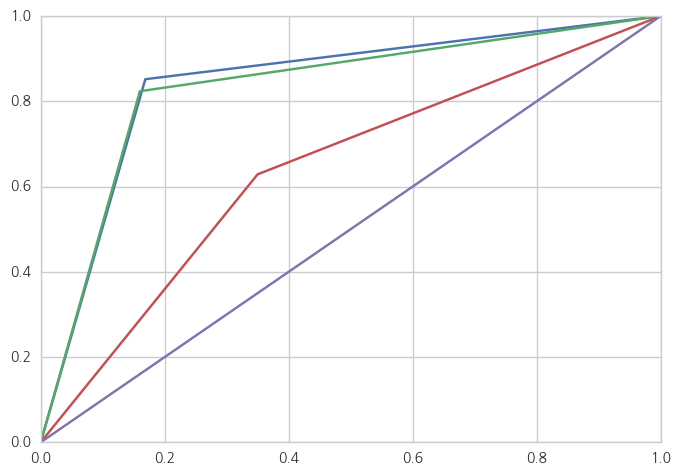

In [14]:
from sklearn.metrics import roc_curve
svc3_f0_fpr, svc3_f0_tpr, svc3_f0_thresholds = roc_curve(y_test3_list[0], svc3_f0.predict(X_test3_list[0])) 
svc3_f1_fpr, svc3_f1_tpr, svc3_f1_thresholds = roc_curve(y_test3_list[1], svc3_f1.predict(X_test3_list[1])) 
svc3_f2_fpr, svc3_f2_tpr, svc3_f2_thresholds = roc_curve(y_test3_list[2], svc3_f2.predict(X_test3_list[2])) 
plt.plot(svc3_f0_fpr, svc3_f0_tpr)
plt.plot(svc3_f1_fpr, svc3_f1_tpr)
plt.plot(svc3_f2_fpr, svc3_f2_tpr)
plt.plot([0, 1], [0, 1])
plt.show()